## Segmentación de clientes

## Librerías

In [171]:
# Librerías para visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns

# Librerías para manipulación y análisis de datos
import numpy as np
import pandas as pd

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.decomposition import PCA
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import FunctionTransformer

from toolbox_DS import *

import warnings
warnings.filterwarnings('ignore')
pd.option_context('mode.use_inf_as_na', True)


## Funciones

In [172]:


# Crear un gráfico de radar
def crear_grafico_radar(stats, etiquetas, titulo):
    """
    Crea y muestra un gráfico de radar con las estadísticas y etiquetas proporcionadas.
    
    Parámetros:
    - stats: Lista de estadísticas para cada variable.
    - etiquetas: Lista de etiquetas para cada eje del gráfico de radar.
    """
    # Número de variables que estamos graficando.
    num_vars = len(stats)
    
    # Dividir el círculo y calcular los ángulos necesarios para representar cada eje.
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    
    # El gráfico es circular, por lo que necesitamos cerrar el círculo y los ángulos deben completarse.
    stats += stats[:1]
    angles += angles[:1]
    
    # Iniciar el gráfico de radar.
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    
    # Dibujar una línea alrededor del gráfico de radar.
    ax.fill(angles, stats, color='red', alpha=0.25)
    
    # Dibujar las líneas de los ejes.
    ax.plot(angles, stats, color='red', linewidth=2)

    ax.set_title(titulo)
    
    # Establecer las etiquetas para los ejes.
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(etiquetas)
    
    # Mostrar el gráfico.
    plt.show()

# Crear gráfico de radar múltiple
def crear_grafico_radar_multiples(stats_list, etiquetas, colores, titulo, leyenda):
    """
    Crea y muestra un gráfico de radar con múltiples conjuntos de estadísticas.
    
    Parámetros:
    - stats_list: Lista de listas de estadísticas para cada conjunto de datos.
    - etiquetas: Lista de etiquetas para cada eje del gráfico de radar.
    - colores: Lista de colores para cada conjunto de datos.
    - titulo: Título del gráfico.
    """
    # Número de variables que estamos graficando.
    num_vars = len(etiquetas)
    
    # Dividir el círculo y calcular los ángulos necesarios para representar cada eje.
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]  # Completar el círculo
    
    # Iniciar el gráfico de radar.
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    
    # Graficar cada conjunto de estadísticas en el gráfico de radar.
    for stats, color in zip(stats_list, colores):
        stats += stats[:1]  # Completar el círculo
        ax.fill(angles, stats, color=color, alpha=0.25)
        ax.plot(angles, stats, color=color, linewidth=2)
    
    # Establecer las etiquetas para los ejes.
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(etiquetas)
    
    # Añadir un título
    plt.title(titulo, size=20, color='black', y=1.1)
    
    # Mostrar el gráfico.
    plt.show()


## Carga de datos 

### Train_set

In [173]:
train_set = pd.read_csv('./data/train_set.csv')
train_set

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5675        1960         PhD       Divorced  50611.0        0   
1      5543        1966  Graduation       Together  57811.0        0   
2      3011        1965  Graduation        Married  69139.0        0   
3       535        1987  Graduation       Divorced  81361.0        0   
4     10755        1976    2n Cycle        Married  23718.0        1   
...     ...         ...         ...            ...      ...      ...   
1785   5320        1973      Master       Divorced  44051.0        1   
1786   2894        1985  Graduation         Single  72903.0        0   
1787   1726        1970  Graduation         Single  22585.0        0   
1788   6905        1994  Graduation       Together  80685.0        0   
1789   6634        1979      Master       Divorced  33462.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  Response  income_missing  \
0            1  2012-10-04       98       459  ...         0               0   
1            1  2013-06-24       49       545  ...         0               0   
2            1  2014-01-27       23        86  ...         0               0   
3            0  2014-02-25       18       163  ...         0               0   
4            0  2013-09-02       76         6  ...         0               0   
...        ...         ...      ...       ...  ...       ...             ...   
1785         1  2013-01-29       20        79  ...         1               0   
1786         0  2013-10-29       74      1067  ...         1               0   
1787         0  2013-03-18       23         3  ...         1               0   
1788         0  2012-08-22       55       241  ...         0               0   
1789         0  2013-08-07       78        22  ...         0               0   

       age  customes_seniority  Household_members  Total_amount  \
0     55.0                   3                2.0           493   
1     49.0                   2                3.0           802   
2     50.0                   1                3.0           227   
3     28.0                   1                1.0           778   
4     39.0                   2                3.0            81   
...    ...                 ...                ...           ...   
1785  42.0                   2                3.0           171   
1786  30.0                   2                1.0          2013   
1787  45.0                   2                1.0            81   
1788  21.0                   3                2.0          1004   
1789  36.0                   2                2.0            54   

      Total_purchase  Median_amount_purchase  Total_cmp  Total_%_cmp  
0                 22               22.409091          1          0.2  
1                 25               32.080000          1          0.2  
2                 11               20.636364          0          0.0  
3                 27               28.814815          0          0.0  
4                  9                9.000000          0          0.0  
...              ...                     ...        ...          ...  
1785              12               14.250000          0          0.0  
1786              21               95.857143          3          0.6  
1787               5               16.200000          1          0.2  
1788              21               47.809524          0          0.0  
1789               6                9.000000          0          0.0  

[1790 rows x 36 columns]

In [174]:
train_set.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'income_missing', 'age',
       'customes_seniority', 'Household_members', 'Total_amount',
       'Total_purchase', 'Median_amount_purchase', 'Total_cmp', 'Total_%_cmp'],
      dtype='object')

In [175]:
# Cambio el índice
train_set.set_index('ID', inplace=True)

# Cambio tipo a datetime
train_set['Dt_Customer'] = pd.to_datetime(train_set['Dt_Customer'])

# Cambiar tipo a categóricas
cols_to_category = ['Education', 'Marital_Status']
train_set[cols_to_category] = train_set[cols_to_category].astype('category')

# Elimino columna 'income_missing'
train_set = train_set.drop(columns=['income_missing', 'Year_Birth','Total_%_cmp','Dt_Customer'])

# Elimino el outlier de Income
train_set = train_set.loc[train_set['Income'] !=666666]

### Test_set

In [176]:
test_set = pd.read_csv('./data/test_set.csv')


ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0     2853        1980  Graduation         Single  51766.0        1         0   
1    10492        1959  Graduation       Together  38285.0        2         1   
2     8939        1959  Graduation       Divorced  61250.0        0         1   
3     6274        1948      Master        Married  83790.0        0         0   
4    10232        1963         PhD       Divorced  48799.0        0         1   
..     ...         ...         ...            ...      ...      ...       ...   
443    550        1952  Graduation       Divorced  62335.0        0         1   
444  10466        1965  Graduation        Married  44393.0        1         1   
445   7514        1956    2n Cycle       Together  54342.0        1         1   
446    520        1974  Graduation        Married  34421.0        1         0   
447   8870        1984  Graduation       Together  35196.0        1         0   

    Dt_Customer  Recency  MntWines  ...  Complain  Response   age  \
0    2014-03-11       74        60  ...         0         0  35.0   
1    2014-06-24       96         2  ...         0         0  56.0   
2    2012-12-16       49       382  ...         0         0  56.0   
3    2013-11-15       81      1076  ...         0         0  67.0   
4    2013-11-05        9       174  ...         0         0  52.0   
..          ...      ...       ...  ...       ...       ...   ...   
443  2013-05-23       87       243  ...         0         0  63.0   
444  2013-08-22       86        24  ...         0         0  50.0   
445  2013-07-03       74        84  ...         0         0  59.0   
446  2013-07-01       81         3  ...         0         0  41.0   
447  2012-11-13       68        75  ...         0         1  31.0   

     customes_seniority  Household_members  Total_amount  Total_purchase  \
0                     1                2.0           275              12   
1                     1                5.0            10               4   
2                     3                2.0           730              25   
3                     2                2.0          1615              25   
4                     2                2.0           331              15   
..                  ...                ...           ...             ...   
443                   2                2.0           708              21   
444                   2                4.0            60               7   
445                   2                4.0           177              12   
446                   2                3.0            30               4   
447                   3                3.0           497              18   

     Median_amount_purchase  Total_cmp  Total_%_cmp  
0                 22.916667          0          0.0  
1                  2.500000          0          0.0  
2                 29.200000          0          0.0  
3                 64.600000          2          0.4  
4                 22.066667          0          0.0  
..                      ...        ...          ...  
443               33.714286          0          0.0  
444                8.571429          0          0.0  
445               14.750000          0          0.0  
446                7.500000          0          0.0  
447               27.611111          0          0.0  

[448 rows x 35 columns]

In [177]:
# Cambio el índice
test_set.set_index('ID', inplace=True)

# Cambio tipo a datetime
test_set['Dt_Customer'] = pd.to_datetime(test_set['Dt_Customer'])

# Cambiar tipo a categóricas
cols_to_category = ['Education', 'Marital_Status']
test_set[cols_to_category] = test_set[cols_to_category].astype('category')

# Elimino columna 'income_missing'
test_set = test_set.drop(columns=['Year_Birth','Total_%_cmp','Dt_Customer'])

# Elimino el outlier de Income
test_set = test_set.loc[test_set['Income'] !=666666]

## Tratamiento de variables

Selección de features por dtype

In [178]:
features_num = train_set.select_dtypes(['int','float']).columns
features_cat = train_set.select_dtypes(['object', 'category']).columns
print('features_num', features_num)
print('features_cat', features_cat)

features_num Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'age', 'customes_seniority',
       'Household_members', 'Total_amount', 'Total_purchase',
       'Median_amount_purchase', 'Total_cmp'],
      dtype='object')
features_cat Index(['Education', 'Marital_Status'], dtype='object')


#### Preparación de las transformaciones

In [179]:
# Definimos el OrdinalEncoder con el mapeo de 'education_ode'
ordinal_encoder = OrdinalEncoder(categories=[['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD']])

categorical_features_onehot = ['Marital_Status']
categorical_features_ordinal = ['Education']
numerical_features = features_num

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat_onehot', OneHotEncoder(), categorical_features_onehot),
        ('cat_ordinal', Pipeline([
            ('ordinal', ordinal_encoder),
            ('scaler', MinMaxScaler())
        ]), categorical_features_ordinal)
    ]
)

## Clusterización

Primera valoración del KMeans con un rango entre 3 y 7 clúster

In [180]:
soluciones = list(range(2, 6))

codo = []
silueta = []
calins = []
davies = []

for solucion in soluciones:
    
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('kmeans', KMeans(random_state=42, n_clusters=solucion, n_init=10))
    ])
    
   
    pipeline.fit(train_set)
    
    # Obtenemos los datos transformados del paso 'preprocessor'
    X_transformed = pipeline.named_steps['preprocessor'].transform(train_set)
    
    # Obtenemos las etiquetas del cluster del paso 'kmeans'
    labels = pipeline.named_steps['kmeans'].labels_
    
    # Recoger las métricas usando los datos transformados
    codo.append(pipeline.named_steps['kmeans'].inertia_)
    silueta.append(silhouette_score(X_transformed, labels))
    calins.append(calinski_harabasz_score(X_transformed, labels))
    davies.append(davies_bouldin_score(X_transformed, labels))

Resultados a dataframe y visualización gráfica

In [181]:
metricas = pd.DataFrame({'Solucion':soluciones,
              'Codo': codo,
              'Silueta':silueta,
              'Calins':calins,           
              'Davies':davies}).set_index('Solucion')

metricas

Codo   Silueta       Calins    Davies
Solucion                                               
2         2.224857e+11  0.610429  4573.916473  0.517957
3         1.153475e+11  0.546915  5238.595198  0.546227
4         6.879278e+10  0.533793  6255.445547  0.552486
5         4.591883e+10  0.531803  7247.002376  0.538253

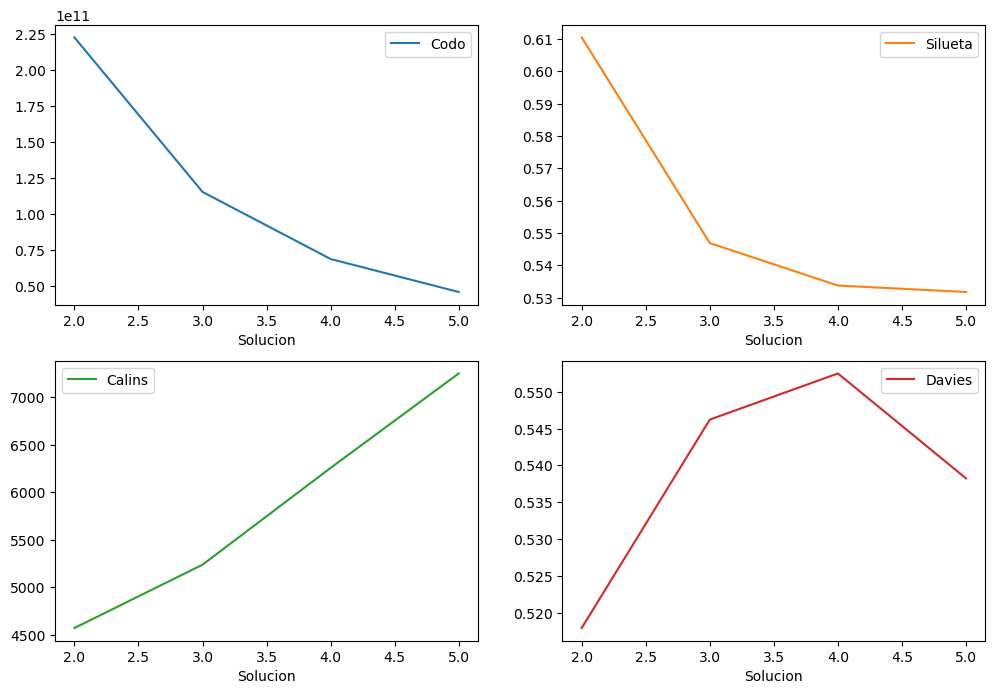

In [182]:
metricas.plot(subplots = True, figsize = (12,8), layout = (2,2), sharex = False);

Parece que estaría entre 2 y 4 sería el mejor número para los clúster.

In [183]:
k =3
# Instanciar el pipeline con el preprocesador y KMeans
pipeline = Pipeline(steps=[
       ('preprocessor', preprocessor),
       ('kmeans', KMeans(random_state=42, n_clusters=k, n_init=10))
   ])
    
# Entrenar el pipeline
pipeline.fit(train_set)
    
# Obtenemos los datos transformados del paso 'preprocessor'
X_transformed = pipeline.named_steps['preprocessor'].transform(train_set)
    
# Reducir las dimensiones a 2D usando PCA para la visualización
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_transformed)

# Obtenemos las etiquetas del cluster del paso 'kmeans'
labels = pipeline.named_steps['kmeans'].labels_

# Si deseas añadir las etiquetas de los clusters al DataFrame original
train_set['Cluster'] = labels

# Obtenemos los centroides de los clusters en el espacio PCA
cluster_centers = pipeline.named_steps['kmeans'].cluster_centers_
cluster_centers_pca = pca.transform(cluster_centers)

In [184]:
train_set['Cluster'].value_counts(True).round(2)

Cluster
2    0.35
1    0.34
0    0.31
Name: proportion, dtype: float64

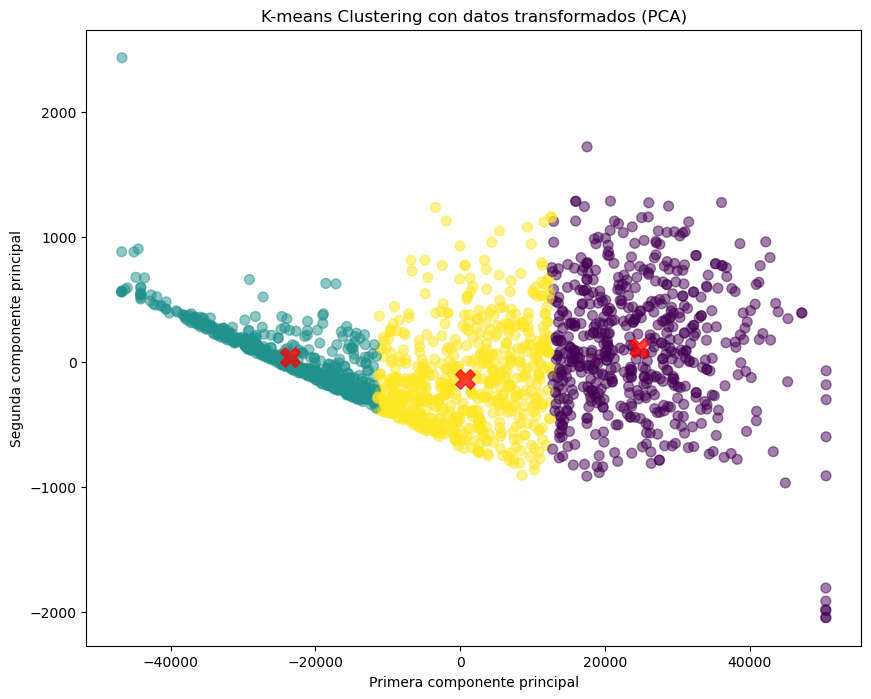

In [185]:
# Crear una figura para los datos transformados con PCA
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, s=50, cmap='viridis', marker='o', alpha=0.5)
plt.scatter(cluster_centers_pca[:, 0], cluster_centers_pca[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title('K-means Clustering con datos transformados (PCA)')
plt.xlabel('Primera componente principal')
plt.ylabel('Segunda componente principal')
plt.show()

### Clústering contra nuevos datos
Aprovechando el test_set se hace un clustering con los centroides del train_set

In [186]:
# Preprocesar el test_set con el preprocesador del pipeline
X_test_transformed = pipeline.named_steps['preprocessor'].transform(test_set)

# Reducir las dimensiones del test_set a 2D usando el mismo PCA ajustado anteriormente
X_test_pca = pca.transform(X_test_transformed)

# Predecir las etiquetas de los clusters para el test_set
y_predict_kmeans = pipeline.named_steps['kmeans'].predict(X_test_transformed)

# Añadir las etiquetas de los clusters al DataFrame test_set para su análisis posterior
test_set['Cluster'] = y_predict_kmeans

In [187]:
test_set['Cluster'].value_counts(True).round(2)

Cluster
2    0.36
1    0.32
0    0.32
Name: proportion, dtype: float64

In [188]:
# Evaluar el rendimiento utilizando métricas como el Silhouette Score
silhouette_avg = silhouette_score(X_test_transformed, y_predict_kmeans)
print(f"El Silhouette Score promedio en el conjunto de prueba es: {silhouette_avg}")

ch_score = calinski_harabasz_score(X_test_transformed, y_predict_kmeans)
print(f"Calinski-Harabasz Score: {ch_score}")

db_score = davies_bouldin_score(X_test_transformed, y_predict_kmeans)
print(f"Davies-Bouldin Score: {db_score}")

El Silhouette Score promedio en el conjunto de prueba es: 0.5365081250549592
Calinski-Harabasz Score: 1290.2523716249757
Davies-Bouldin Score: 0.5686265150900328


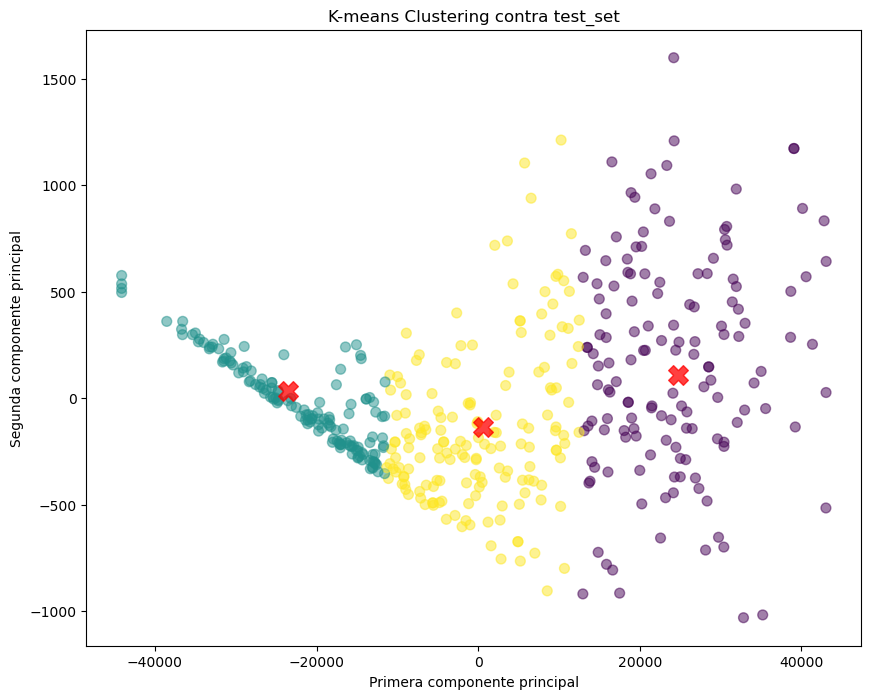

In [189]:
# Crear una figura para los datos transformados con PCA
plt.figure(figsize=(10, 8))
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_predict_kmeans, s=50, cmap='viridis', marker='o', alpha=0.5)
plt.scatter(cluster_centers_pca[:, 0], cluster_centers_pca[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title('K-means Clustering contra test_set')
plt.xlabel('Primera componente principal')
plt.ylabel('Segunda componente principal')
plt.show()

## Análisis clúster con respecto a las variables

### Análisis con variables numéricas

Análisis de Income vs Cluster
****************************************


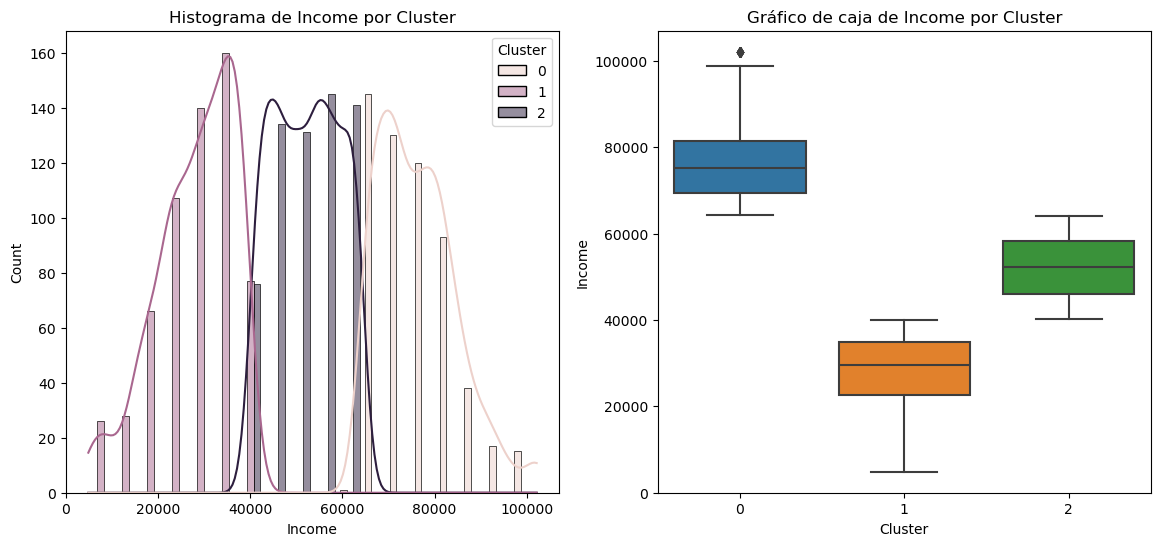

Estadísticos de resumen para Income por Cluster:
         count      mean      std      min       25%      50%      75%  \
Cluster                                                                  
0        559.0  76321.67  8545.55  64260.0  69492.00  75276.0  81370.5   
1        604.0  28090.91  8408.72   4861.0  22582.25  29638.0  34972.0   
2        627.0  52250.23  7101.39  40211.0  46051.00  52332.0  58340.0   

              max  
Cluster            
0        102160.0  
1         40059.0  
2         64191.0  

ANOVA para Income:
Estadístico F: 5252.17
p-valor: 0.000
La variable Income está significativamente asociada con Cluster (p < 0.05). Podría ser útil para el modelo.

Análisis de Kidhome vs Cluster
****************************************


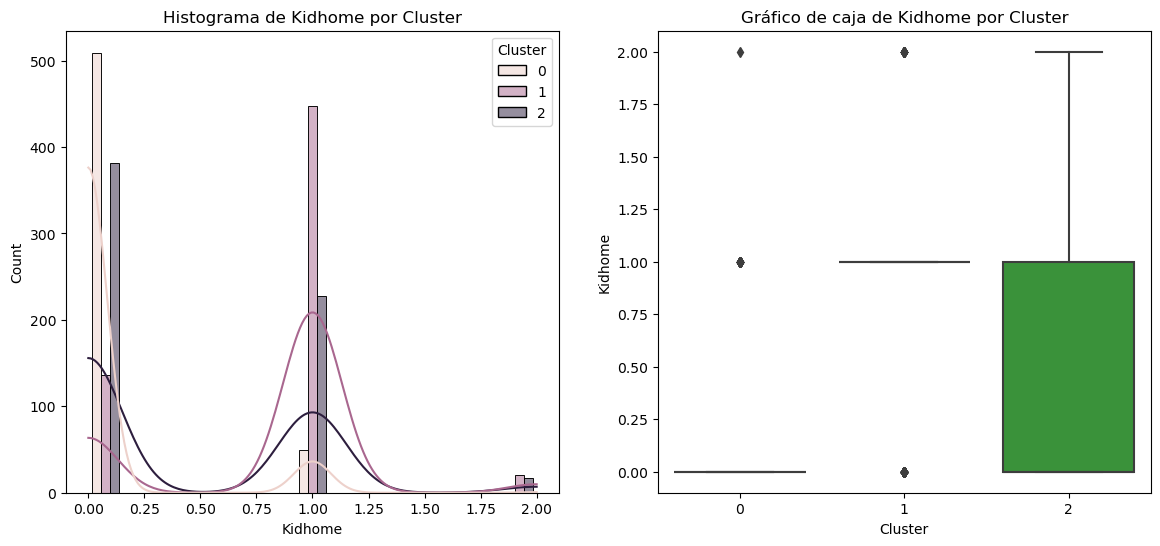

Estadísticos de resumen para Kidhome por Cluster:
         count  mean   std  min  25%  50%  75%  max
Cluster                                            
0        559.0  0.09  0.29  0.0  0.0  0.0  0.0  2.0
1        604.0  0.81  0.47  0.0  1.0  1.0  1.0  2.0
2        627.0  0.42  0.55  0.0  0.0  0.0  1.0  2.0

ANOVA para Kidhome:
Estadístico F: 363.94
p-valor: 0.000
La variable Kidhome está significativamente asociada con Cluster (p < 0.05). Podría ser útil para el modelo.

Análisis de Teenhome vs Cluster
****************************************


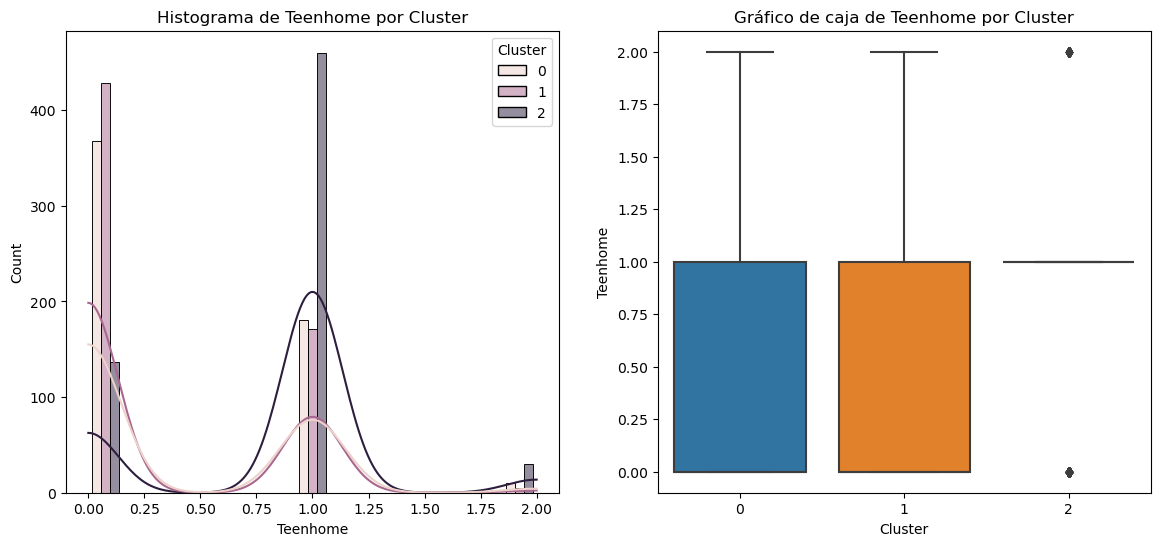

Estadísticos de resumen para Teenhome por Cluster:
         count  mean   std  min  25%  50%  75%  max
Cluster                                            
0        559.0  0.36  0.52  0.0  0.0  0.0  1.0  2.0
1        604.0  0.30  0.48  0.0  0.0  0.0  1.0  2.0
2        627.0  0.83  0.49  0.0  1.0  1.0  1.0  2.0

ANOVA para Teenhome:
Estadístico F: 212.45
p-valor: 0.000
La variable Teenhome está significativamente asociada con Cluster (p < 0.05). Podría ser útil para el modelo.

Análisis de Recency vs Cluster
****************************************


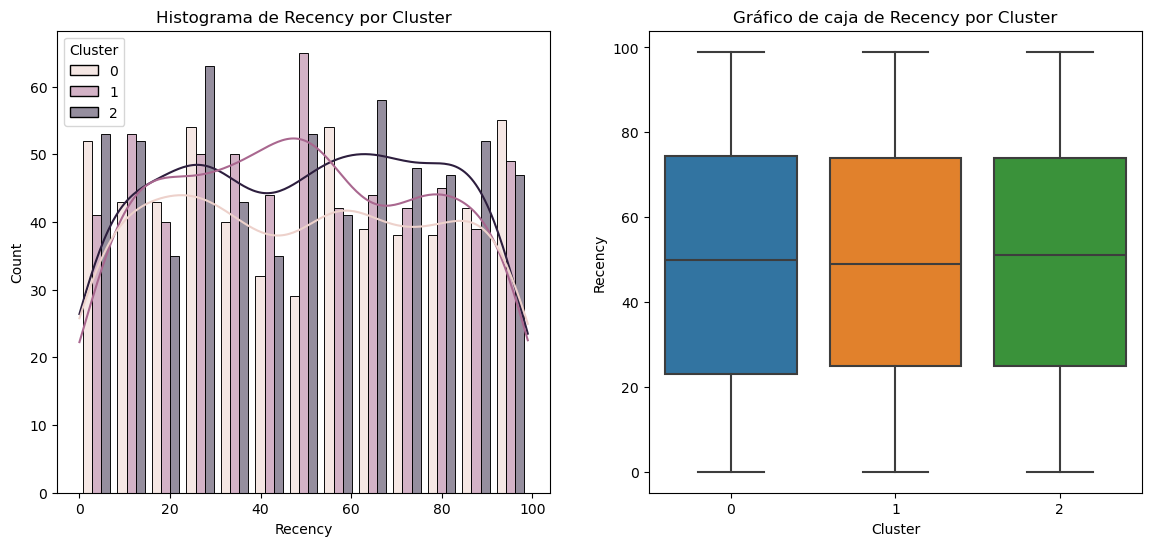

Estadísticos de resumen para Recency por Cluster:
         count   mean    std  min   25%   50%   75%   max
Cluster                                                  
0        559.0  48.86  29.97  0.0  23.0  50.0  74.5  99.0
1        604.0  48.91  28.17  0.0  25.0  49.0  74.0  99.0
2        627.0  49.35  28.93  0.0  25.0  51.0  74.0  99.0

ANOVA para Recency:
Estadístico F: 0.05
p-valor: 0.947
La variable Recency no está significativamente asociada con Cluster (p >= 0.05).

Análisis de MntWines vs Cluster
****************************************


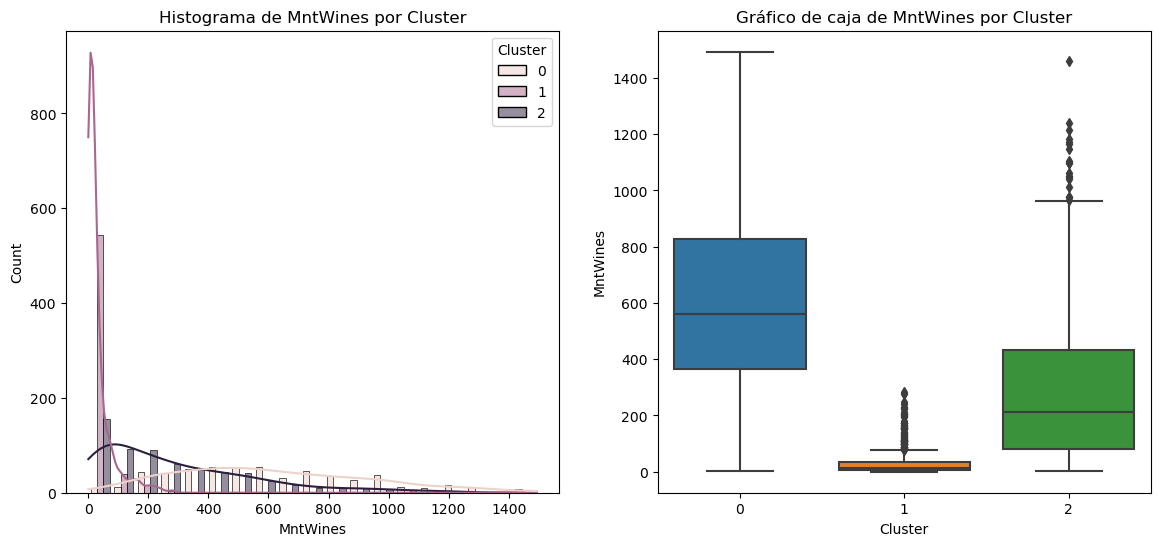

Estadísticos de resumen para MntWines por Cluster:
         count    mean     std  min    25%    50%    75%     max
Cluster                                                         
0        559.0  611.16  326.40  1.0  364.5  561.0  829.0  1493.0
1        604.0   30.71   44.55  0.0    6.0   14.0   34.0   284.0
2        627.0  290.82  265.87  2.0   79.5  213.0  433.5  1459.0

ANOVA para MntWines:
Estadístico F: 834.44
p-valor: 0.000
La variable MntWines está significativamente asociada con Cluster (p < 0.05). Podría ser útil para el modelo.

Análisis de MntFruits vs Cluster
****************************************


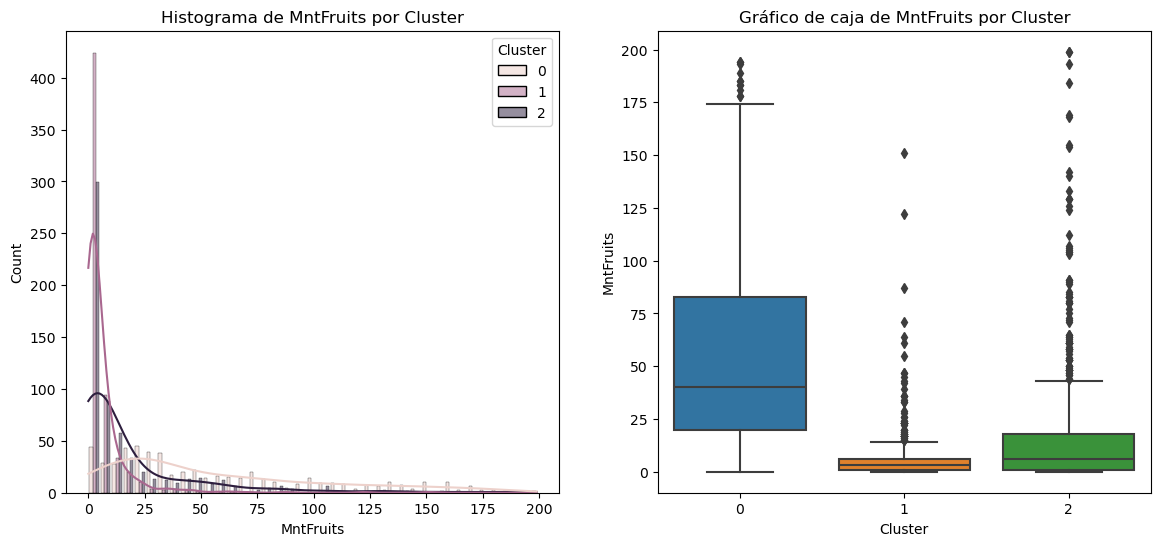

Estadísticos de resumen para MntFruits por Cluster:
         count   mean    std  min   25%   50%    75%    max
Cluster                                                    
0        559.0  56.82  48.54  0.0  20.0  40.0  83.00  194.0
1        604.0   6.03  11.92  0.0   1.0   3.0   6.25  151.0
2        627.0  18.32  31.19  0.0   1.0   6.0  18.00  199.0

ANOVA para MntFruits:
Estadístico F: 359.62
p-valor: 0.000
La variable MntFruits está significativamente asociada con Cluster (p < 0.05). Podría ser útil para el modelo.

Análisis de MntMeatProducts vs Cluster
****************************************


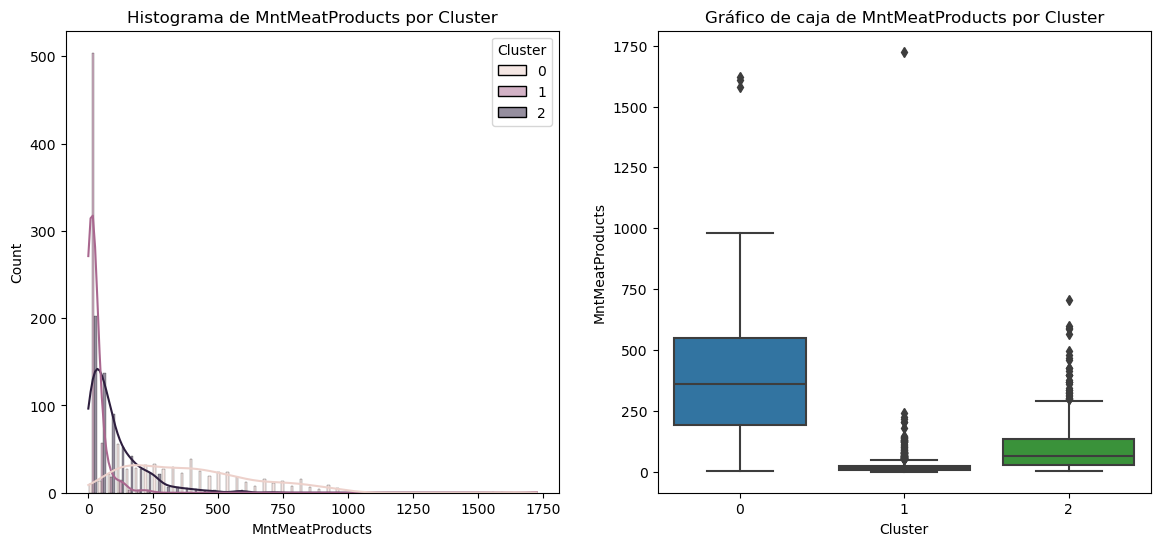

Estadísticos de resumen para MntMeatProducts por Cluster:
         count    mean     std  min    25%    50%    75%     max
Cluster                                                         
0        559.0  395.03  252.70  1.0  191.5  359.0  549.0  1622.0
1        604.0   26.87   76.29  0.0    8.0   14.0   25.0  1725.0
2        627.0   96.41  101.80  1.0   26.0   64.0  133.5   706.0

ANOVA para MntMeatProducts:
Estadístico F: 862.56
p-valor: 0.000
La variable MntMeatProducts está significativamente asociada con Cluster (p < 0.05). Podría ser útil para el modelo.

Análisis de MntFishProducts vs Cluster
****************************************


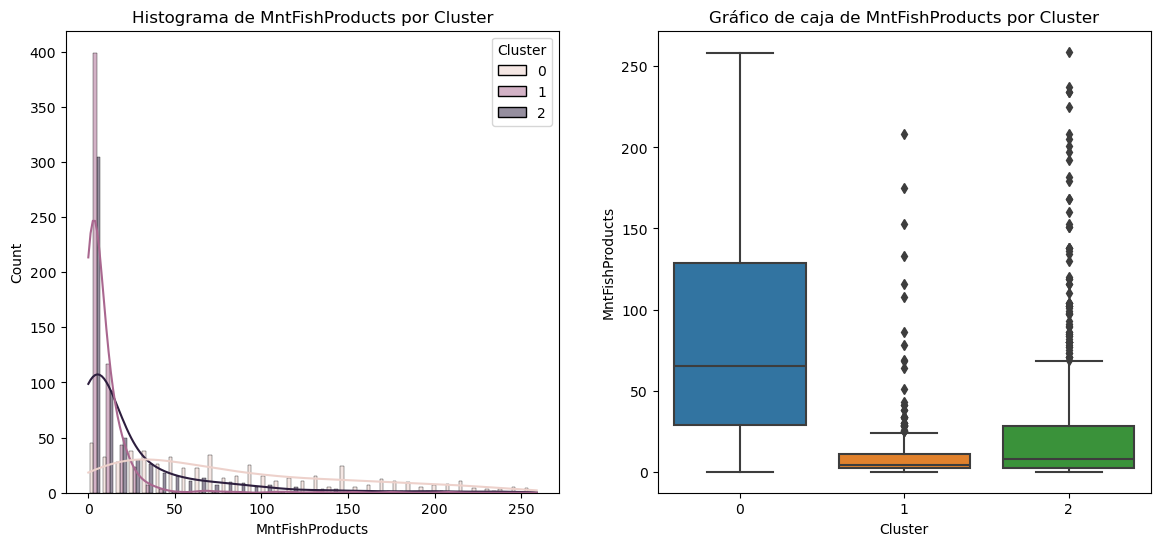

Estadísticos de resumen para MntFishProducts por Cluster:
         count   mean    std  min   25%   50%    75%    max
Cluster                                                    
0        559.0  83.44  66.33  0.0  29.0  65.0  128.5  258.0
1        604.0   8.87  17.54  0.0   2.0   4.0   11.0  208.0
2        627.0  24.71  40.73  0.0   2.0   8.0   28.5  259.0

ANOVA para MntFishProducts:
Estadístico F: 431.70
p-valor: 0.000
La variable MntFishProducts está significativamente asociada con Cluster (p < 0.05). Podría ser útil para el modelo.

Análisis de MntSweetProducts vs Cluster
****************************************


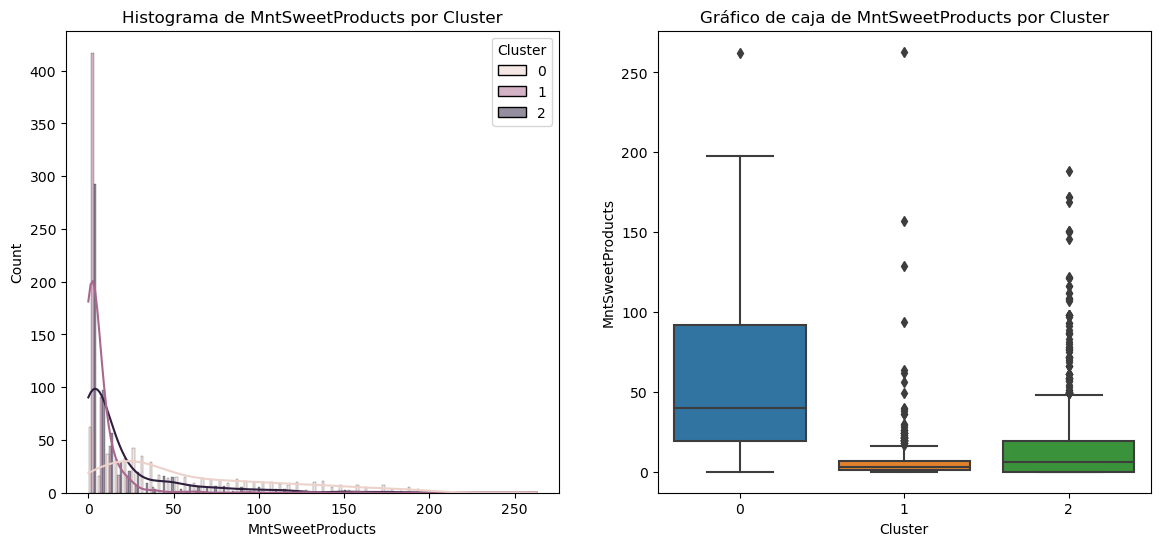

Estadísticos de resumen para MntSweetProducts por Cluster:
         count   mean    std  min   25%   50%   75%    max
Cluster                                                   
0        559.0  59.07  51.83  0.0  19.0  40.0  92.0  262.0
1        604.0   6.37  15.71  0.0   1.0   3.0   7.0  263.0
2        627.0  17.97  29.56  0.0   0.0   6.0  19.5  188.0

ANOVA para MntSweetProducts:
Estadístico F: 359.41
p-valor: 0.000
La variable MntSweetProducts está significativamente asociada con Cluster (p < 0.05). Podría ser útil para el modelo.

Análisis de MntGoldProds vs Cluster
****************************************


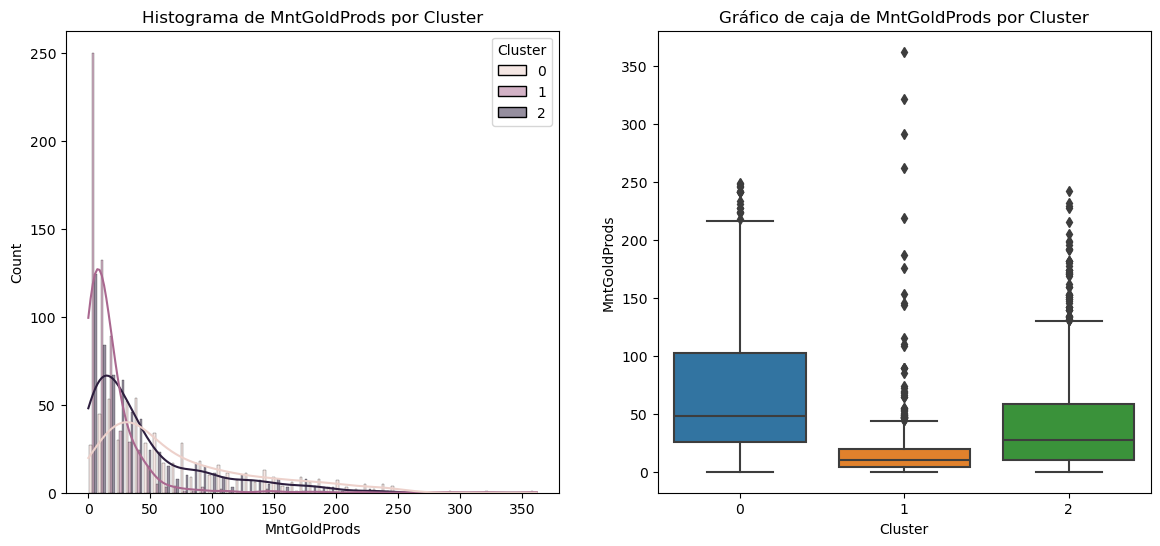

Estadísticos de resumen para MntGoldProds por Cluster:
         count   mean    std  min   25%   50%    75%    max
Cluster                                                    
0        559.0  70.13  59.73  0.0  26.0  48.0  102.0  249.0
1        604.0  18.49  32.99  0.0   4.0  10.0   20.0  362.0
2        627.0  44.17  48.21  0.0  10.0  27.0   58.0  242.0

ANOVA para MntGoldProds:
Estadístico F: 168.66
p-valor: 0.000
La variable MntGoldProds está significativamente asociada con Cluster (p < 0.05). Podría ser útil para el modelo.

Análisis de NumDealsPurchases vs Cluster
****************************************


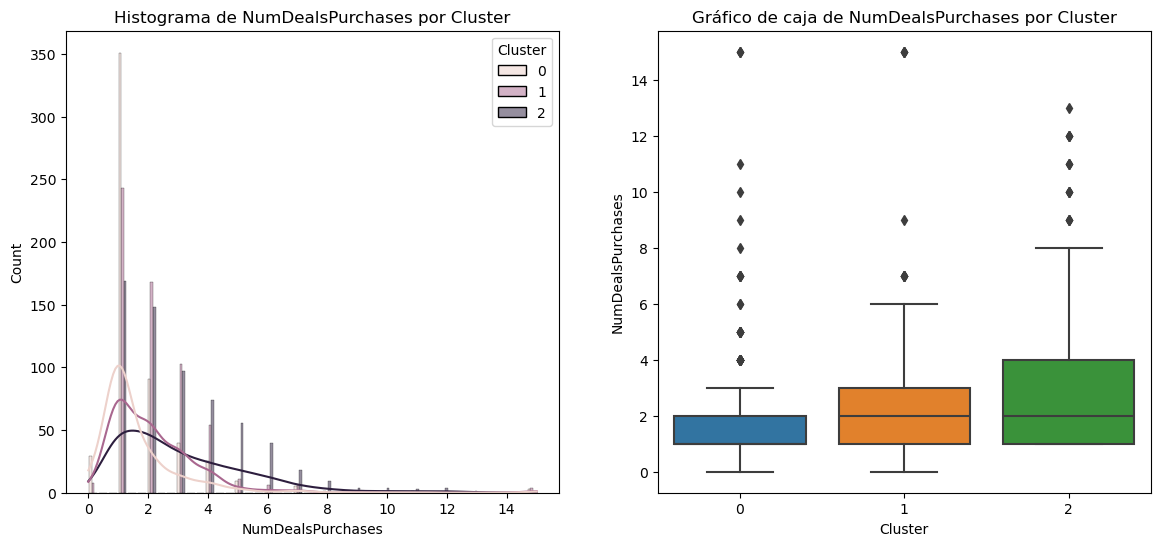

Estadísticos de resumen para NumDealsPurchases por Cluster:
         count  mean   std  min  25%  50%  75%   max
Cluster                                             
0        559.0  1.66  1.65  0.0  1.0  1.0  2.0  15.0
1        604.0  2.16  1.65  0.0  1.0  2.0  3.0  15.0
2        627.0  3.09  2.17  1.0  1.0  2.0  4.0  13.0

ANOVA para NumDealsPurchases:
Estadístico F: 92.69
p-valor: 0.000
La variable NumDealsPurchases está significativamente asociada con Cluster (p < 0.05). Podría ser útil para el modelo.

Análisis de NumWebPurchases vs Cluster
****************************************


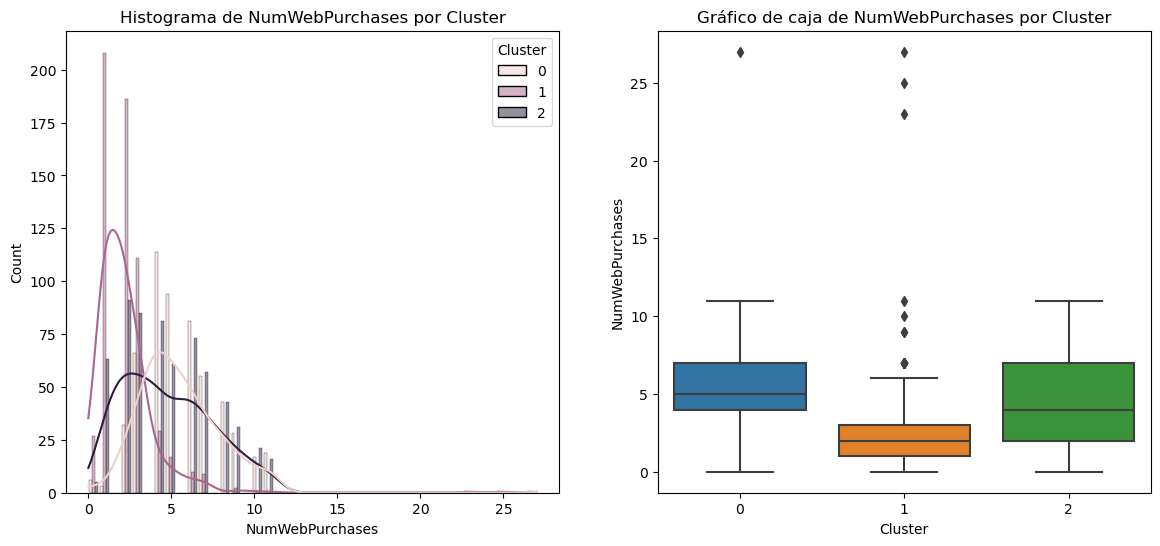

Estadísticos de resumen para NumWebPurchases por Cluster:
         count  mean   std  min  25%  50%  75%   max
Cluster                                             
0        559.0  5.48  2.49  0.0  4.0  5.0  7.0  27.0
1        604.0  2.24  2.19  0.0  1.0  2.0  3.0  27.0
2        627.0  4.74  2.72  0.0  2.0  4.0  7.0  11.0

ANOVA para NumWebPurchases:
Estadístico F: 278.87
p-valor: 0.000
La variable NumWebPurchases está significativamente asociada con Cluster (p < 0.05). Podría ser útil para el modelo.

Análisis de NumCatalogPurchases vs Cluster
****************************************


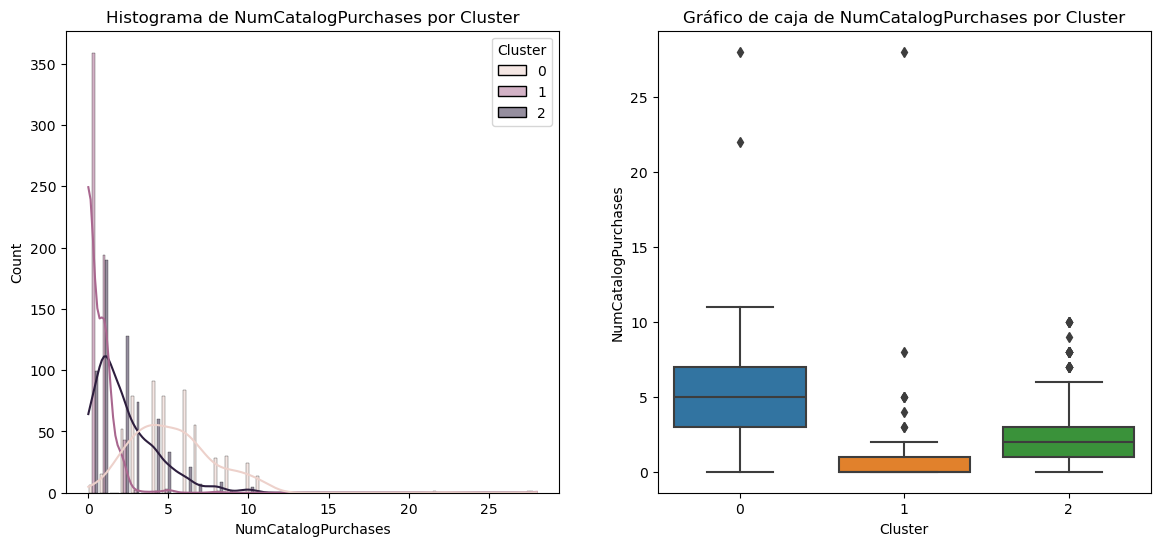

Estadísticos de resumen para NumCatalogPurchases por Cluster:
         count  mean   std  min  25%  50%  75%   max
Cluster                                             
0        559.0  5.26  2.74  0.0  3.0  5.0  7.0  28.0
1        604.0  0.56  1.37  0.0  0.0  0.0  1.0  28.0
2        627.0  2.20  1.95  0.0  1.0  2.0  3.0  10.0

ANOVA para NumCatalogPurchases:
Estadístico F: 762.94
p-valor: 0.000
La variable NumCatalogPurchases está significativamente asociada con Cluster (p < 0.05). Podría ser útil para el modelo.

Análisis de NumStorePurchases vs Cluster
****************************************


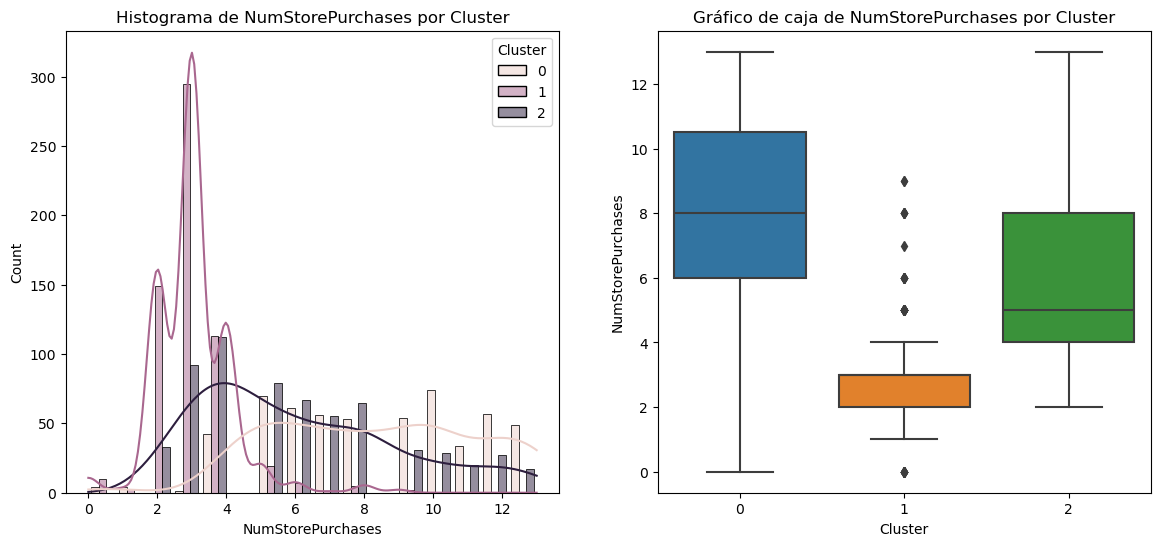

Estadísticos de resumen para NumStorePurchases por Cluster:
         count  mean   std  min  25%  50%   75%   max
Cluster                                              
0        559.0  8.28  2.94  0.0  6.0  8.0  10.5  13.0
1        604.0  3.05  1.09  0.0  2.0  3.0   3.0   9.0
2        627.0  6.10  2.89  2.0  4.0  5.0   8.0  13.0

ANOVA para NumStorePurchases:
Estadístico F: 668.57
p-valor: 0.000
La variable NumStorePurchases está significativamente asociada con Cluster (p < 0.05). Podría ser útil para el modelo.

Análisis de NumWebVisitsMonth vs Cluster
****************************************


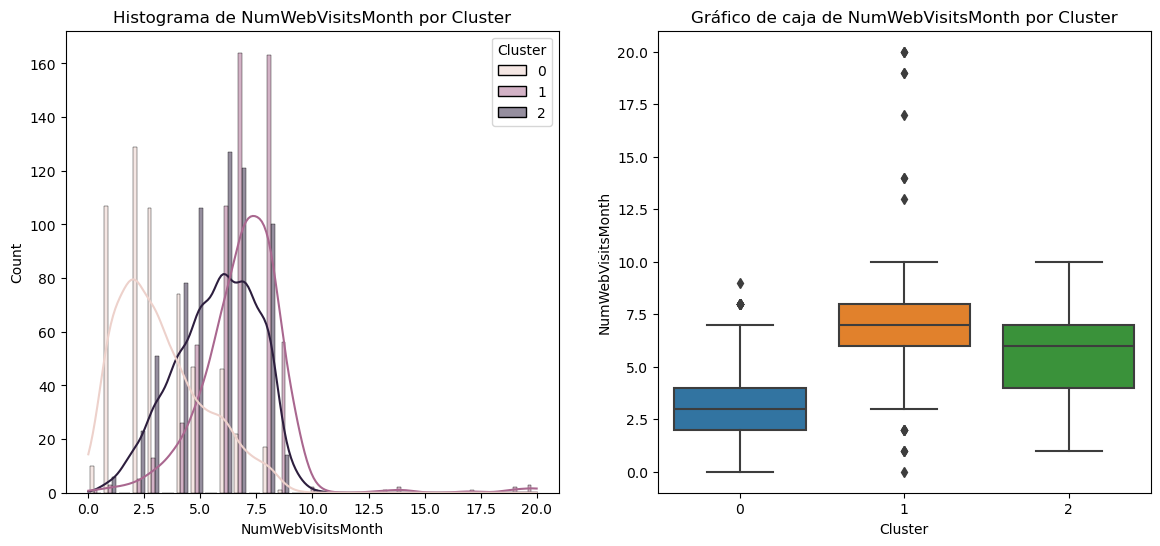

Estadísticos de resumen para NumWebVisitsMonth por Cluster:
         count  mean   std  min  25%  50%  75%   max
Cluster                                             
0        559.0  3.20  1.95  0.0  2.0  3.0  4.0   9.0
1        604.0  6.96  2.03  0.0  6.0  7.0  8.0  20.0
2        627.0  5.73  1.79  1.0  4.0  6.0  7.0  10.0

ANOVA para NumWebVisitsMonth:
Estadístico F: 573.50
p-valor: 0.000
La variable NumWebVisitsMonth está significativamente asociada con Cluster (p < 0.05). Podría ser útil para el modelo.

Análisis de AcceptedCmp3 vs Cluster
****************************************


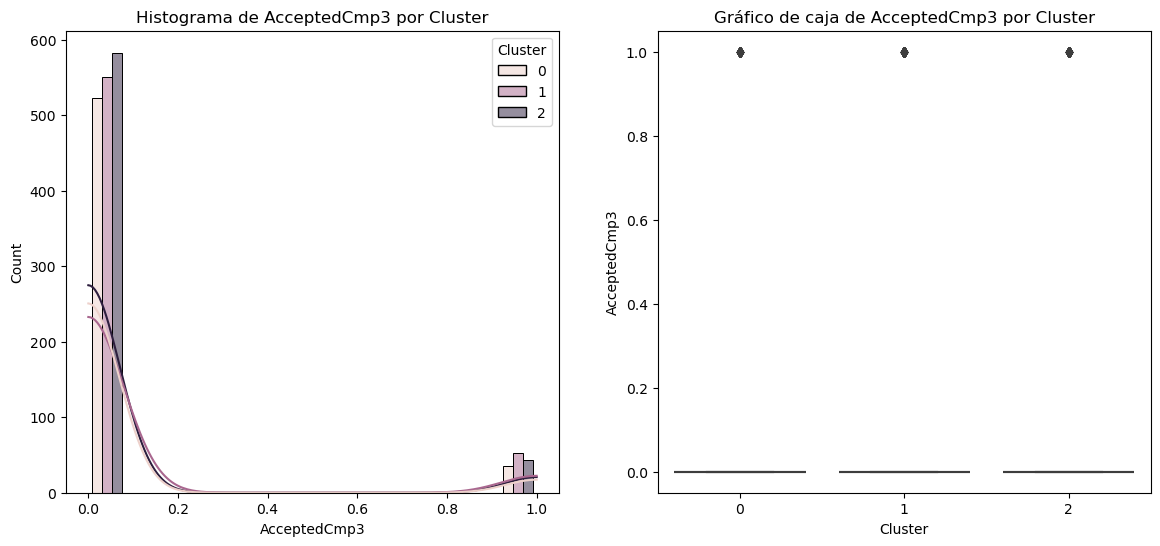

Estadísticos de resumen para AcceptedCmp3 por Cluster:
         count  mean   std  min  25%  50%  75%  max
Cluster                                            
0        559.0  0.06  0.25  0.0  0.0  0.0  0.0  1.0
1        604.0  0.09  0.28  0.0  0.0  0.0  0.0  1.0
2        627.0  0.07  0.26  0.0  0.0  0.0  0.0  1.0

ANOVA para AcceptedCmp3:
Estadístico F: 1.27
p-valor: 0.281
La variable AcceptedCmp3 no está significativamente asociada con Cluster (p >= 0.05).

Análisis de AcceptedCmp4 vs Cluster
****************************************


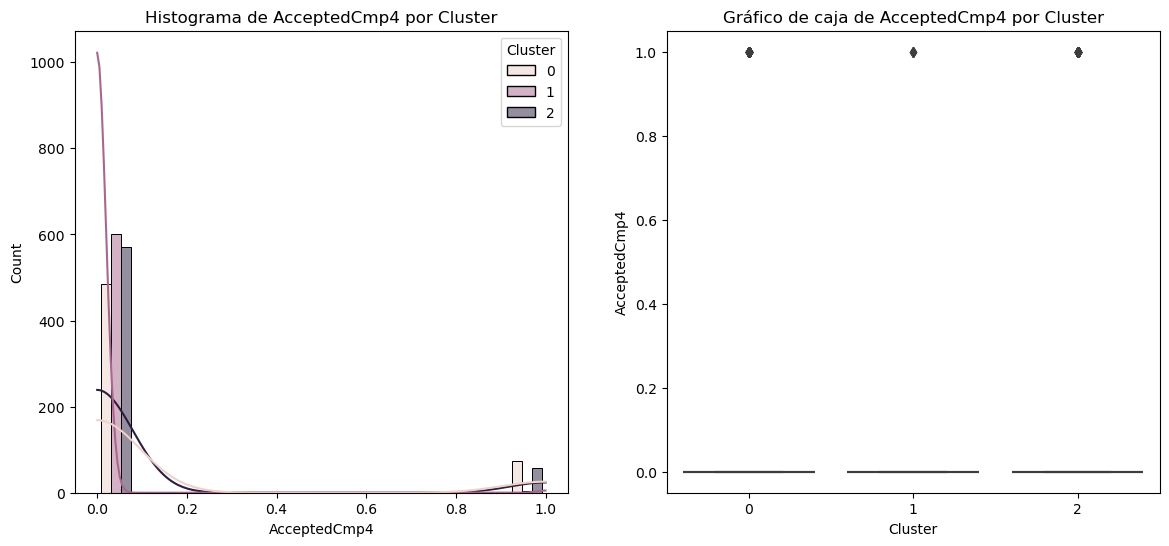

Estadísticos de resumen para AcceptedCmp4 por Cluster:
         count  mean   std  min  25%  50%  75%  max
Cluster                                            
0        559.0  0.13  0.34  0.0  0.0  0.0  0.0  1.0
1        604.0  0.00  0.07  0.0  0.0  0.0  0.0  1.0
2        627.0  0.09  0.29  0.0  0.0  0.0  0.0  1.0

ANOVA para AcceptedCmp4:
Estadístico F: 37.25
p-valor: 0.000
La variable AcceptedCmp4 está significativamente asociada con Cluster (p < 0.05). Podría ser útil para el modelo.

Análisis de AcceptedCmp5 vs Cluster
****************************************


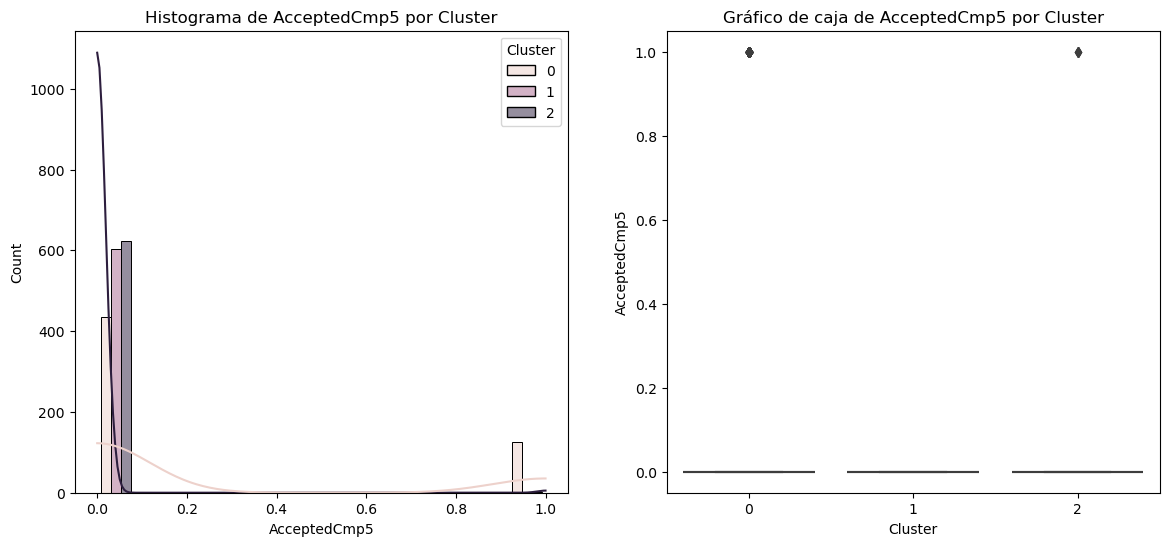

Estadísticos de resumen para AcceptedCmp5 por Cluster:
         count  mean   std  min  25%  50%  75%  max
Cluster                                            
0        559.0  0.22  0.42  0.0  0.0  0.0  0.0  1.0
1        604.0  0.00  0.00  0.0  0.0  0.0  0.0  0.0
2        627.0  0.00  0.07  0.0  0.0  0.0  0.0  1.0

ANOVA para AcceptedCmp5:
Estadístico F: 168.04
p-valor: 0.000
La variable AcceptedCmp5 está significativamente asociada con Cluster (p < 0.05). Podría ser útil para el modelo.

Análisis de AcceptedCmp1 vs Cluster
****************************************


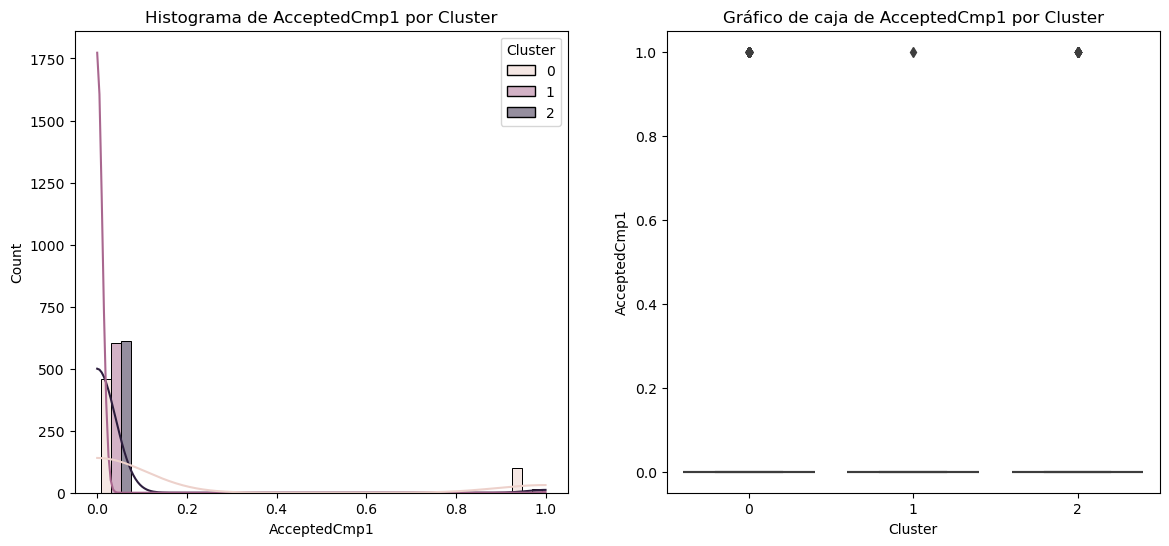

Estadísticos de resumen para AcceptedCmp1 por Cluster:
         count  mean   std  min  25%  50%  75%  max
Cluster                                            
0        559.0  0.18  0.39  0.0  0.0  0.0  0.0  1.0
1        604.0  0.00  0.04  0.0  0.0  0.0  0.0  1.0
2        627.0  0.02  0.15  0.0  0.0  0.0  0.0  1.0

ANOVA para AcceptedCmp1:
Estadístico F: 101.29
p-valor: 0.000
La variable AcceptedCmp1 está significativamente asociada con Cluster (p < 0.05). Podría ser útil para el modelo.

Análisis de AcceptedCmp2 vs Cluster
****************************************


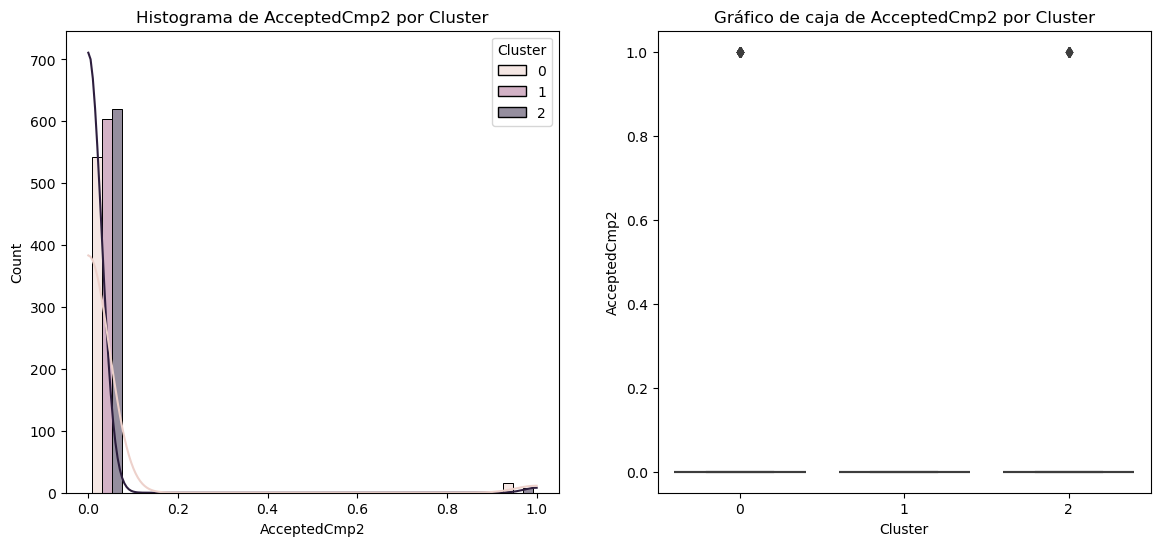

Estadísticos de resumen para AcceptedCmp2 por Cluster:
         count  mean   std  min  25%  50%  75%  max
Cluster                                            
0        559.0  0.03  0.17  0.0  0.0  0.0  0.0  1.0
1        604.0  0.00  0.00  0.0  0.0  0.0  0.0  0.0
2        627.0  0.01  0.11  0.0  0.0  0.0  0.0  1.0

ANOVA para AcceptedCmp2:
Estadístico F: 9.57
p-valor: 0.000
La variable AcceptedCmp2 está significativamente asociada con Cluster (p < 0.05). Podría ser útil para el modelo.

Análisis de Complain vs Cluster
****************************************


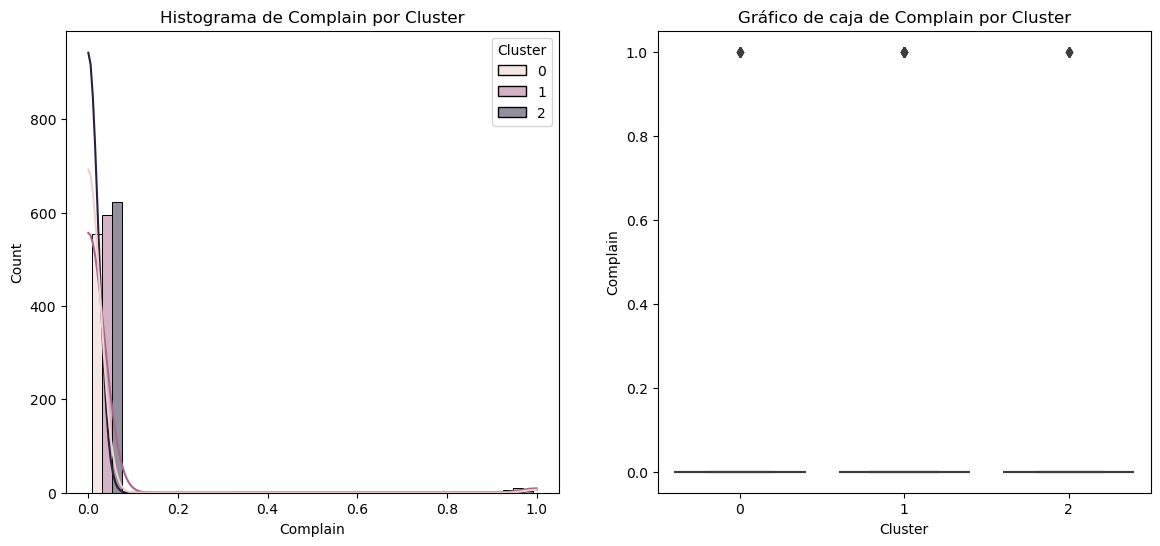

Estadísticos de resumen para Complain por Cluster:
         count  mean   std  min  25%  50%  75%  max
Cluster                                            
0        559.0  0.01  0.09  0.0  0.0  0.0  0.0  1.0
1        604.0  0.02  0.13  0.0  0.0  0.0  0.0  1.0
2        627.0  0.01  0.08  0.0  0.0  0.0  0.0  1.0

ANOVA para Complain:
Estadístico F: 1.63
p-valor: 0.197
La variable Complain no está significativamente asociada con Cluster (p >= 0.05).

Análisis de Response vs Cluster
****************************************


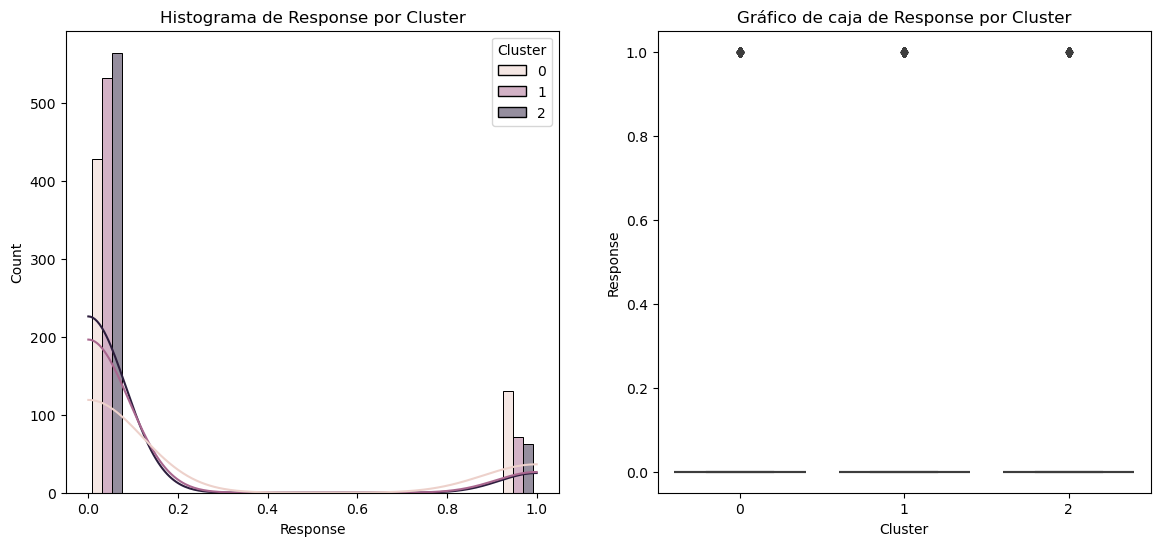

Estadísticos de resumen para Response por Cluster:
         count  mean   std  min  25%  50%  75%  max
Cluster                                            
0        559.0  0.23  0.42  0.0  0.0  0.0  0.0  1.0
1        604.0  0.12  0.32  0.0  0.0  0.0  0.0  1.0
2        627.0  0.10  0.30  0.0  0.0  0.0  0.0  1.0

ANOVA para Response:
Estadístico F: 24.67
p-valor: 0.000
La variable Response está significativamente asociada con Cluster (p < 0.05). Podría ser útil para el modelo.

Análisis de age vs Cluster
****************************************


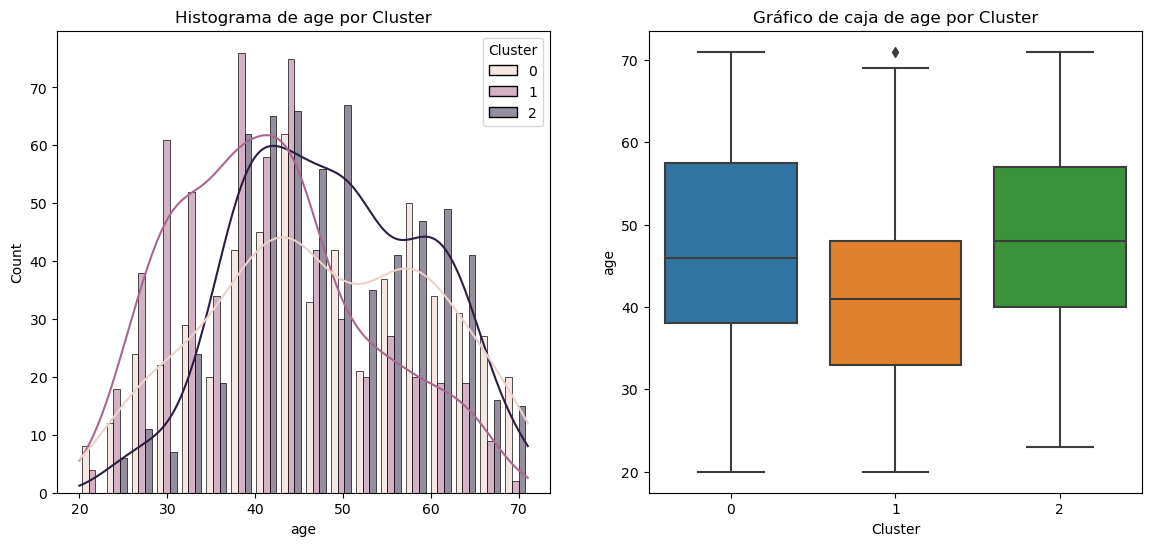

Estadísticos de resumen para age por Cluster:
         count   mean    std   min   25%   50%   75%   max
Cluster                                                   
0        559.0  47.48  12.57  20.0  38.0  46.0  57.5  71.0
1        604.0  41.60  10.81  20.0  33.0  41.0  48.0  71.0
2        627.0  48.74  10.45  23.0  40.0  48.0  57.0  71.0

ANOVA para age:
Estadístico F: 69.34
p-valor: 0.000
La variable age está significativamente asociada con Cluster (p < 0.05). Podría ser útil para el modelo.

Análisis de customes_seniority vs Cluster
****************************************


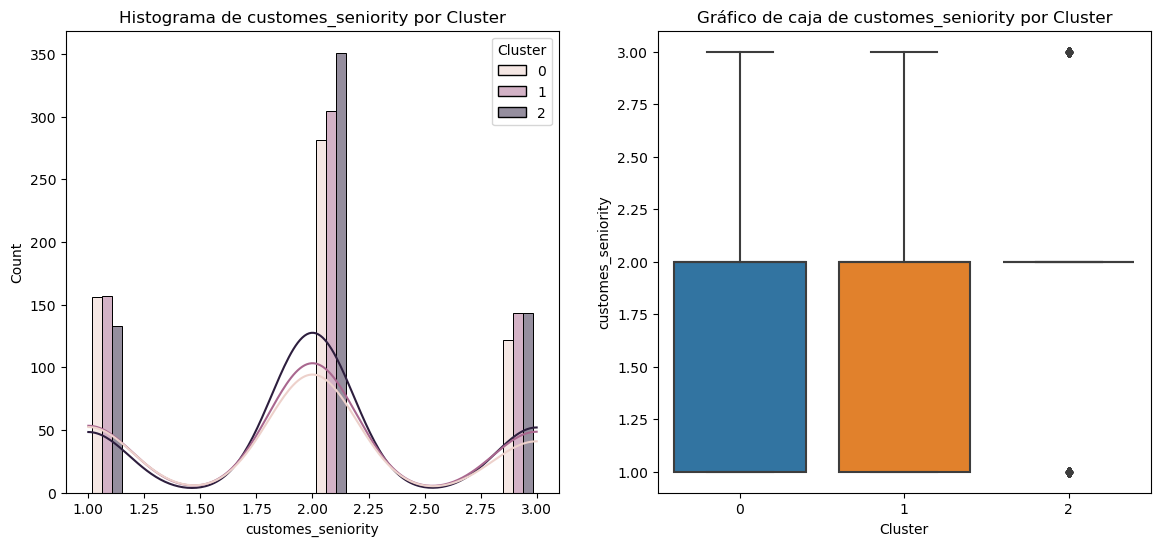

Estadísticos de resumen para customes_seniority por Cluster:
         count  mean   std  min  25%  50%  75%  max
Cluster                                            
0        559.0  1.94  0.70  1.0  1.0  2.0  2.0  3.0
1        604.0  1.98  0.70  1.0  1.0  2.0  2.0  3.0
2        627.0  2.02  0.66  1.0  2.0  2.0  2.0  3.0

ANOVA para customes_seniority:
Estadístico F: 1.83
p-valor: 0.160
La variable customes_seniority no está significativamente asociada con Cluster (p >= 0.05).

Análisis de Household_members vs Cluster
****************************************


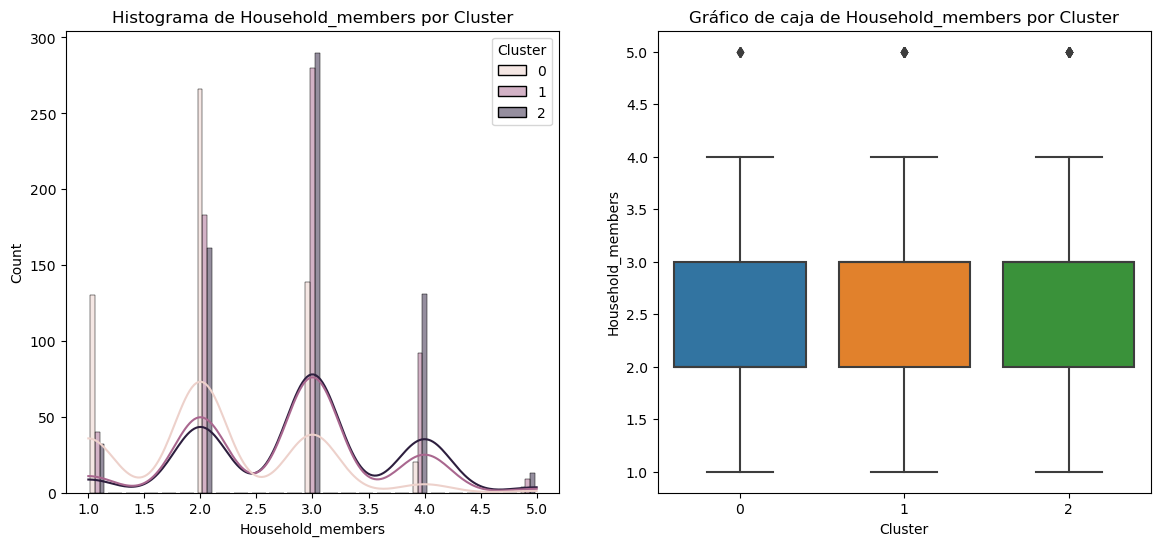

Estadísticos de resumen para Household_members por Cluster:
         count  mean   std  min  25%  50%  75%  max
Cluster                                            
0        559.0  2.11  0.82  1.0  2.0  2.0  3.0  5.0
1        604.0  2.75  0.85  1.0  2.0  3.0  3.0  5.0
2        627.0  2.89  0.86  1.0  2.0  3.0  3.0  5.0

ANOVA para Household_members:
Estadístico F: 140.82
p-valor: 0.000
La variable Household_members está significativamente asociada con Cluster (p < 0.05). Podría ser útil para el modelo.

Análisis de Total_amount vs Cluster
****************************************


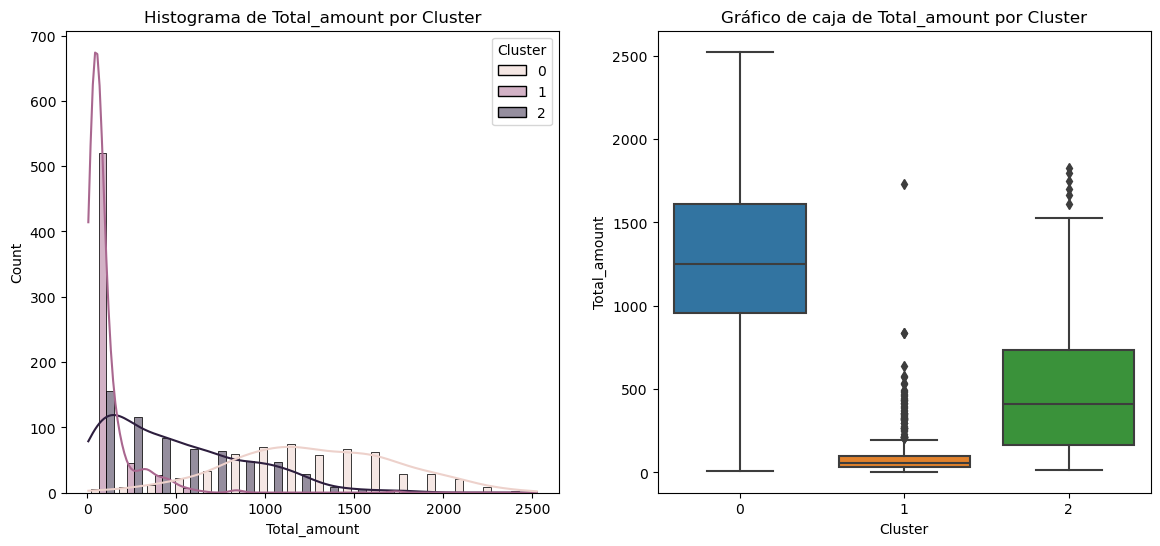

Estadísticos de resumen para Total_amount por Cluster:
         count     mean     std   min    25%     50%     75%     max
Cluster                                                             
0        559.0  1275.65  468.27   6.0  958.5  1250.0  1609.5  2524.0
1        604.0    97.34  128.80   5.0   35.0    57.0   101.0  1730.0
2        627.0   492.40  387.09  13.0  167.0   411.0   735.5  1826.0

ANOVA para Total_amount:
Estadístico F: 1639.65
p-valor: 0.000
La variable Total_amount está significativamente asociada con Cluster (p < 0.05). Podría ser útil para el modelo.

Análisis de Total_purchase vs Cluster
****************************************


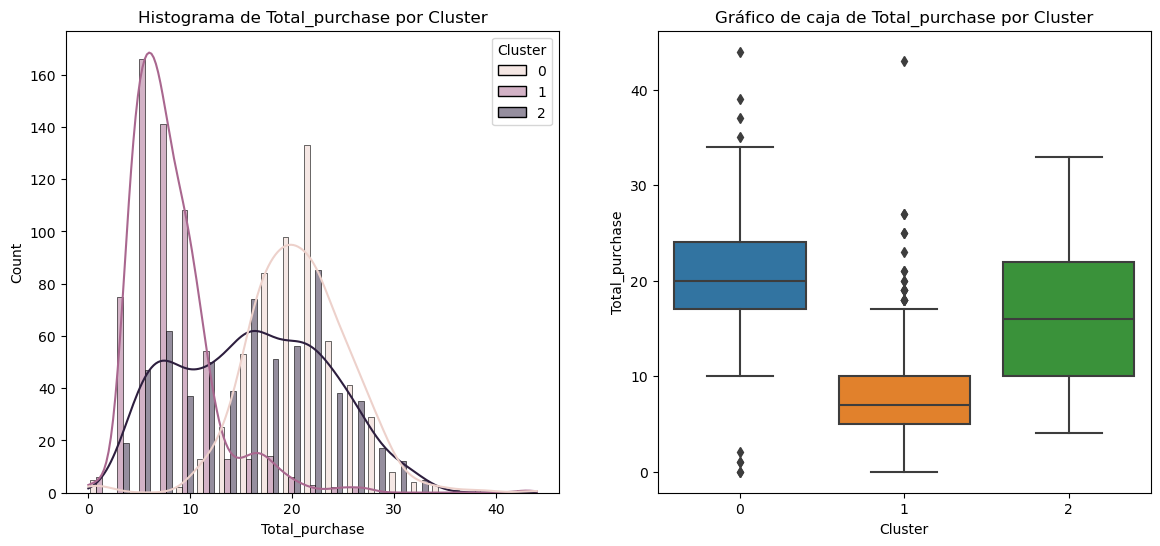

Estadísticos de resumen para Total_purchase por Cluster:
         count   mean   std  min   25%   50%   75%   max
Cluster                                                 
0        559.0  20.68  5.04  0.0  17.0  20.0  24.0  44.0
1        604.0   8.01  4.02  0.0   5.0   7.0  10.0  43.0
2        627.0  16.14  7.17  4.0  10.0  16.0  22.0  33.0

ANOVA para Total_purchase:
Estadístico F: 769.65
p-valor: 0.000
La variable Total_purchase está significativamente asociada con Cluster (p < 0.05). Podría ser útil para el modelo.

Análisis de Median_amount_purchase vs Cluster
****************************************


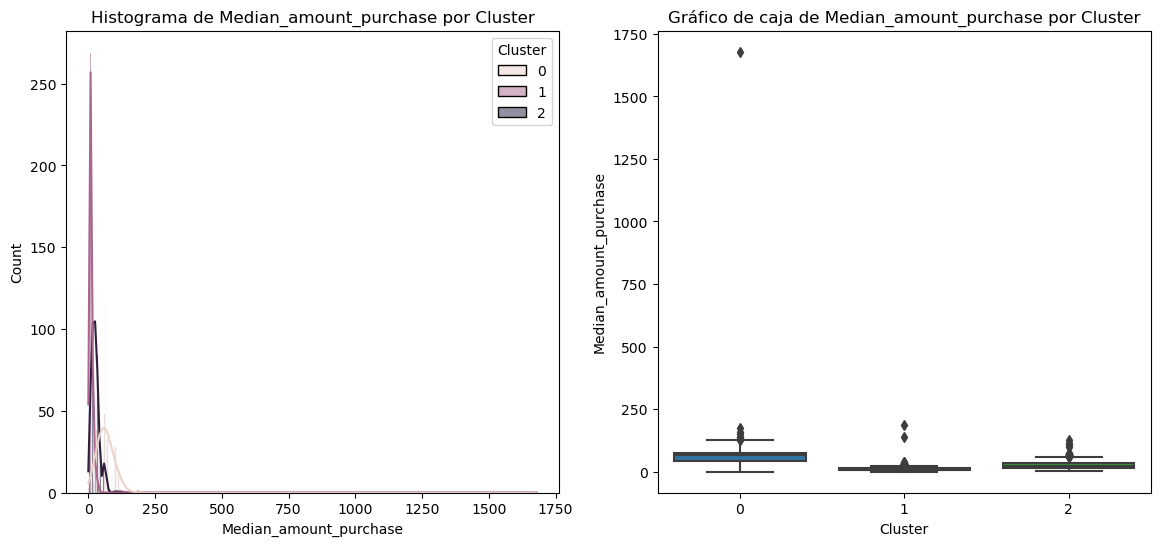

Estadísticos de resumen para Median_amount_purchase por Cluster:
         count   mean    std   min    25%    50%    75%      max
Cluster                                                         
0        559.0  66.43  73.24  0.00  40.70  64.74  74.42  1679.00
1        604.0  10.53  10.89  0.00   5.74   8.09  12.40   186.50
2        627.0  26.42  15.96  3.25  15.81  23.57  33.35   125.17

ANOVA para Median_amount_purchase:
Estadístico F: 265.06
p-valor: 0.000
La variable Median_amount_purchase está significativamente asociada con Cluster (p < 0.05). Podría ser útil para el modelo.

Análisis de Total_cmp vs Cluster
****************************************


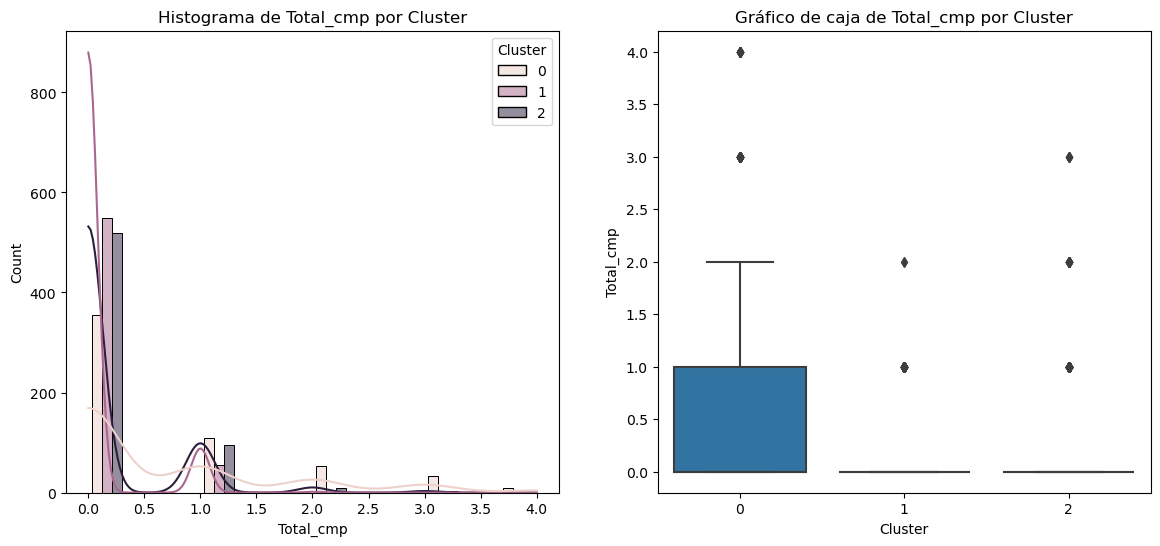

Estadísticos de resumen para Total_cmp por Cluster:
         count  mean   std  min  25%  50%  75%  max
Cluster                                            
0        559.0  0.63  0.99  0.0  0.0  0.0  1.0  4.0
1        604.0  0.09  0.30  0.0  0.0  0.0  0.0  2.0
2        627.0  0.20  0.47  0.0  0.0  0.0  0.0  3.0

ANOVA para Total_cmp:
Estadístico F: 112.47
p-valor: 0.000
La variable Total_cmp está significativamente asociada con Cluster (p < 0.05). Podría ser útil para el modelo.

Las features correlacionadas son: ['Income', 'Kidhome', 'Teenhome', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'age', 'Household_members', 'Total_amount', 'Total_purchase', 'Median_amount_purchase', 'Total_cmp']
Las features NO correlacionadas son: ['Recency', 'AcceptedCmp3', 'C

In [190]:
target = 'Cluster'

analisis_bivariable_numericas_categorica(train_set,target,features_num)

### Análisis con las variables categóricas

Análisis de Education vs Cluster
****************************************


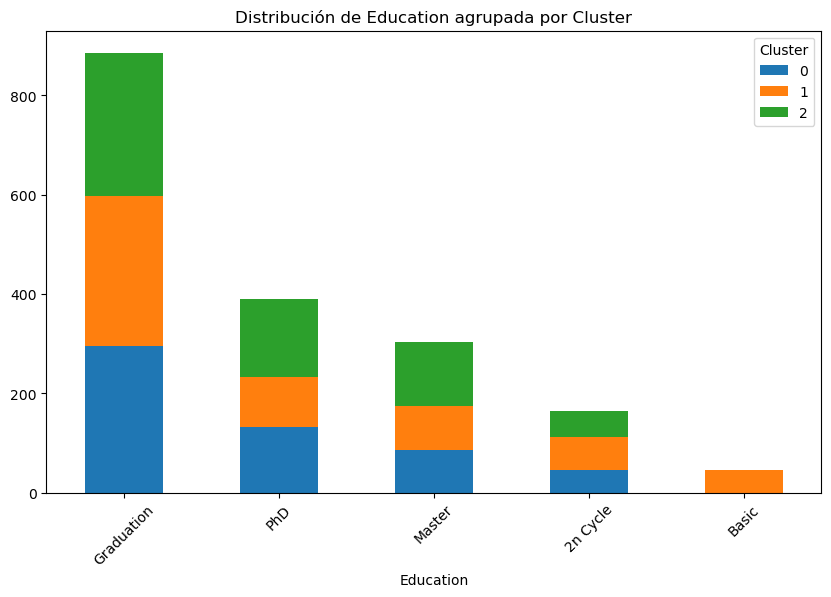

Tabla de contingencia de Education vs Cluster:
Cluster       0    1    2
Education                
Graduation  296  302  288
PhD         133   99  157
Master       85   89  130
2n Cycle     45   68   52
Basic         0   46    0

Tabla de porcentajes de Education respecto a Cluster:
Cluster             0          1          2
Education                                  
Graduation  52.951699  50.000000  45.933014
PhD         23.792487  16.390728  25.039872
Master      15.205725  14.735099  20.733652
2n Cycle     8.050089  11.258278   8.293461
Basic        0.000000   7.615894   0.000000

Tabla de frecuencias para Education:
            Frecuencia Absoluta  Frecuencia Relativa (%)
Education                                               
Graduation                  886                49.497207
PhD                         389                21.731844
Master                      304                16.983240
2n Cycle                    165                 9.217877
Basic                       

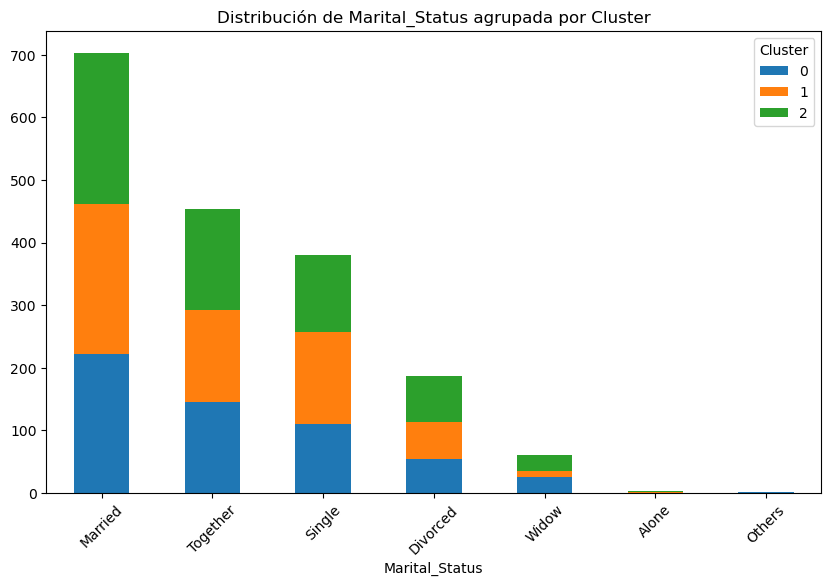

Tabla de contingencia de Marital_Status vs Cluster:
Cluster           0    1    2
Marital_Status               
Married         222  239  242
Together        146  146  162
Single          110  147  123
Divorced         54   60   73
Widow            25   10   26
Alone             0    2    1
Others            2    0    0

Tabla de porcentajes de Marital_Status respecto a Cluster:
Cluster                 0          1          2
Marital_Status                                 
Married         39.713775  39.569536  38.596491
Together        26.118068  24.172185  25.837321
Single          19.677996  24.337748  19.617225
Divorced         9.660107   9.933775  11.642743
Widow            4.472272   1.655629   4.146730
Alone            0.000000   0.331126   0.159490
Others           0.357782   0.000000   0.000000

Tabla de frecuencias para Marital_Status:
                Frecuencia Absoluta  Frecuencia Relativa (%)
Marital_Status                                              
Married              

In [191]:
analisis_bivariable_categoricas_categorica(train_set,target,features_cat)

### Otros análisis

#### Cluster_0

In [192]:
cluster_0 = train_set.loc[train_set['Cluster']==0]
cluster_0.describe().T.round(2)

count      mean      std      min      25%       50%  \
Income                  559.0  76321.67  8545.55  64260.0  69492.0  75276.00   
Kidhome                 559.0      0.09     0.29      0.0      0.0      0.00   
Teenhome                559.0      0.36     0.52      0.0      0.0      0.00   
Recency                 559.0     48.86    29.97      0.0     23.0     50.00   
MntWines                559.0    611.16   326.40      1.0    364.5    561.00   
MntFruits               559.0     56.82    48.54      0.0     20.0     40.00   
MntMeatProducts         559.0    395.03   252.70      1.0    191.5    359.00   
MntFishProducts         559.0     83.44    66.33      0.0     29.0     65.00   
MntSweetProducts        559.0     59.07    51.83      0.0     19.0     40.00   
MntGoldProds            559.0     70.13    59.73      0.0     26.0     48.00   
NumDealsPurchases       559.0      1.66     1.65      0.0      1.0      1.00   
NumWebPurchases         559.0      5.48     2.49      0.0      4.0      5.00   
NumCatalogPurchases     559.0      5.26     2.74      0.0      3.0      5.00   
NumStorePurchases       559.0      8.28     2.94      0.0      6.0      8.00   
NumWebVisitsMonth       559.0      3.20     1.95      0.0      2.0      3.00   
AcceptedCmp3            559.0      0.06     0.25      0.0      0.0      0.00   
AcceptedCmp4            559.0      0.13     0.34      0.0      0.0      0.00   
AcceptedCmp5            559.0      0.22     0.42      0.0      0.0      0.00   
AcceptedCmp1            559.0      0.18     0.39      0.0      0.0      0.00   
AcceptedCmp2            559.0      0.03     0.17      0.0      0.0      0.00   
Complain                559.0      0.01     0.09      0.0      0.0      0.00   
Response                559.0      0.23     0.42      0.0      0.0      0.00   
age                     559.0     47.48    12.57     20.0     38.0     46.00   
customes_seniority      559.0      1.94     0.70      1.0      1.0      2.00   
Household_members       559.0      2.11     0.82      1.0      2.0      2.00   
Total_amount            559.0   1275.65   468.27      6.0    958.5   1250.00   
Total_purchase          559.0     20.68     5.04      0.0     17.0     20.00   
Median_amount_purchase  559.0     66.43    73.24      0.0     40.7     64.74   
Total_cmp               559.0      0.63     0.99      0.0      0.0      0.00   

                             75%       max  
Income                  81370.50  102160.0  
Kidhome                     0.00       2.0  
Teenhome                    1.00       2.0  
Recency                    74.50      99.0  
MntWines                  829.00    1493.0  
MntFruits                  83.00     194.0  
MntMeatProducts           549.00    1622.0  
MntFishProducts           128.50     258.0  
MntSweetProducts           92.00     262.0  
MntGoldProds              102.00     249.0  
NumDealsPurchases           2.00      15.0  
NumWebPurchases             7.00      27.0  
NumCatalogPurchases         7.00      28.0  
NumStorePurchases          10.50      13.0  
NumWebVisitsMonth           4.00       9.0  
AcceptedCmp3                0.00       1.0  
AcceptedCmp4                0.00       1.0  
AcceptedCmp5                0.00       1.0  
AcceptedCmp1                0.00       1.0  
AcceptedCmp2                0.00       1.0  
Complain                    0.00       1.0  
Response                    0.00       1.0  
age                        57.50      71.0  
customes_seniority          2.00       3.0  
Household_members           3.00       5.0  
Total_amount             1609.50    2524.0  
Total_purchase             24.00      44.0  
Median_amount_purchase     74.42    1679.0  
Total_cmp                   1.00       4.0

In [193]:
cluster_0['Marital_Status'].value_counts(normalize=True).round(2)

Marital_Status
Married     0.40
Together    0.26
Single      0.20
Divorced    0.10
Widow       0.04
Others      0.00
Alone       0.00
Name: proportion, dtype: float64

In [194]:
cluster_0['Education'].value_counts(normalize=True).round(2)

Education
Graduation    0.53
PhD           0.24
Master        0.15
2n Cycle      0.08
Basic         0.00
Name: proportion, dtype: float64

#### Cluster_1

In [195]:
cluster_1 = train_set.loc[train_set['Cluster']==1]
cluster_1.describe().T.round(2)

count      mean      std     min       25%       50%  \
Income                  604.0  28090.91  8408.72  4861.0  22582.25  29638.00   
Kidhome                 604.0      0.81     0.47     0.0      1.00      1.00   
Teenhome                604.0      0.30     0.48     0.0      0.00      0.00   
Recency                 604.0     48.91    28.17     0.0     25.00     49.00   
MntWines                604.0     30.71    44.55     0.0      6.00     14.00   
MntFruits               604.0      6.03    11.92     0.0      1.00      3.00   
MntMeatProducts         604.0     26.87    76.29     0.0      8.00     14.00   
MntFishProducts         604.0      8.87    17.54     0.0      2.00      4.00   
MntSweetProducts        604.0      6.37    15.71     0.0      1.00      3.00   
MntGoldProds            604.0     18.49    32.99     0.0      4.00     10.00   
NumDealsPurchases       604.0      2.16     1.65     0.0      1.00      2.00   
NumWebPurchases         604.0      2.24     2.19     0.0      1.00      2.00   
NumCatalogPurchases     604.0      0.56     1.37     0.0      0.00      0.00   
NumStorePurchases       604.0      3.05     1.09     0.0      2.00      3.00   
NumWebVisitsMonth       604.0      6.96     2.03     0.0      6.00      7.00   
AcceptedCmp3            604.0      0.09     0.28     0.0      0.00      0.00   
AcceptedCmp4            604.0      0.00     0.07     0.0      0.00      0.00   
AcceptedCmp5            604.0      0.00     0.00     0.0      0.00      0.00   
AcceptedCmp1            604.0      0.00     0.04     0.0      0.00      0.00   
AcceptedCmp2            604.0      0.00     0.00     0.0      0.00      0.00   
Complain                604.0      0.02     0.13     0.0      0.00      0.00   
Response                604.0      0.12     0.32     0.0      0.00      0.00   
age                     604.0     41.60    10.81    20.0     33.00     41.00   
customes_seniority      604.0      1.98     0.70     1.0      1.00      2.00   
Household_members       604.0      2.75     0.85     1.0      2.00      3.00   
Total_amount            604.0     97.34   128.80     5.0     35.00     57.00   
Total_purchase          604.0      8.01     4.02     0.0      5.00      7.00   
Median_amount_purchase  604.0     10.53    10.89     0.0      5.74      8.09   
Total_cmp               604.0      0.09     0.30     0.0      0.00      0.00   

                             75%      max  
Income                  34972.00  40059.0  
Kidhome                     1.00      2.0  
Teenhome                    1.00      2.0  
Recency                    74.00     99.0  
MntWines                   34.00    284.0  
MntFruits                   6.25    151.0  
MntMeatProducts            25.00   1725.0  
MntFishProducts            11.00    208.0  
MntSweetProducts            7.00    263.0  
MntGoldProds               20.00    362.0  
NumDealsPurchases           3.00     15.0  
NumWebPurchases             3.00     27.0  
NumCatalogPurchases         1.00     28.0  
NumStorePurchases           3.00      9.0  
NumWebVisitsMonth           8.00     20.0  
AcceptedCmp3                0.00      1.0  
AcceptedCmp4                0.00      1.0  
AcceptedCmp5                0.00      0.0  
AcceptedCmp1                0.00      1.0  
AcceptedCmp2                0.00      0.0  
Complain                    0.00      1.0  
Response                    0.00      1.0  
age                        48.00     71.0  
customes_seniority          2.00      3.0  
Household_members           3.00      5.0  
Total_amount              101.00   1730.0  
Total_purchase             10.00     43.0  
Median_amount_purchase     12.40    186.5  
Total_cmp                   0.00      2.0

In [196]:
cluster_1['Marital_Status'].value_counts(normalize=True).round(2)

Marital_Status
Married     0.40
Single      0.24
Together    0.24
Divorced    0.10
Widow       0.02
Alone       0.00
Others      0.00
Name: proportion, dtype: float64

In [197]:
cluster_1['Education'].value_counts(normalize=True).round(2)

Education
Graduation    0.50
PhD           0.16
Master        0.15
2n Cycle      0.11
Basic         0.08
Name: proportion, dtype: float64

#### Cluster_2

In [198]:
cluster_2 = train_set.loc[train_set['Cluster']==2]
cluster_2.describe().T.round(2)

count      mean      std       min       25%  \
Income                  627.0  52250.23  7101.39  40211.00  46051.00   
Kidhome                 627.0      0.42     0.55      0.00      0.00   
Teenhome                627.0      0.83     0.49      0.00      1.00   
Recency                 627.0     49.35    28.93      0.00     25.00   
MntWines                627.0    290.82   265.87      2.00     79.50   
MntFruits               627.0     18.32    31.19      0.00      1.00   
MntMeatProducts         627.0     96.41   101.80      1.00     26.00   
MntFishProducts         627.0     24.71    40.73      0.00      2.00   
MntSweetProducts        627.0     17.97    29.56      0.00      0.00   
MntGoldProds            627.0     44.17    48.21      0.00     10.00   
NumDealsPurchases       627.0      3.09     2.17      1.00      1.00   
NumWebPurchases         627.0      4.74     2.72      0.00      2.00   
NumCatalogPurchases     627.0      2.20     1.95      0.00      1.00   
NumStorePurchases       627.0      6.10     2.89      2.00      4.00   
NumWebVisitsMonth       627.0      5.73     1.79      1.00      4.00   
AcceptedCmp3            627.0      0.07     0.26      0.00      0.00   
AcceptedCmp4            627.0      0.09     0.29      0.00      0.00   
AcceptedCmp5            627.0      0.00     0.07      0.00      0.00   
AcceptedCmp1            627.0      0.02     0.15      0.00      0.00   
AcceptedCmp2            627.0      0.01     0.11      0.00      0.00   
Complain                627.0      0.01     0.08      0.00      0.00   
Response                627.0      0.10     0.30      0.00      0.00   
age                     627.0     48.74    10.45     23.00     40.00   
customes_seniority      627.0      2.02     0.66      1.00      2.00   
Household_members       627.0      2.89     0.86      1.00      2.00   
Total_amount            627.0    492.40   387.09     13.00    167.00   
Total_purchase          627.0     16.14     7.17      4.00     10.00   
Median_amount_purchase  627.0     26.42    15.96      3.25     15.81   
Total_cmp               627.0      0.20     0.47      0.00      0.00   

                             50%       75%       max  
Income                  52332.00  58340.00  64191.00  
Kidhome                     0.00      1.00      2.00  
Teenhome                    1.00      1.00      2.00  
Recency                    51.00     74.00     99.00  
MntWines                  213.00    433.50   1459.00  
MntFruits                   6.00     18.00    199.00  
MntMeatProducts            64.00    133.50    706.00  
MntFishProducts             8.00     28.50    259.00  
MntSweetProducts            6.00     19.50    188.00  
MntGoldProds               27.00     58.00    242.00  
NumDealsPurchases           2.00      4.00     13.00  
NumWebPurchases             4.00      7.00     11.00  
NumCatalogPurchases         2.00      3.00     10.00  
NumStorePurchases           5.00      8.00     13.00  
NumWebVisitsMonth           6.00      7.00     10.00  
AcceptedCmp3                0.00      0.00      1.00  
AcceptedCmp4                0.00      0.00      1.00  
AcceptedCmp5                0.00      0.00      1.00  
AcceptedCmp1                0.00      0.00      1.00  
AcceptedCmp2                0.00      0.00      1.00  
Complain                    0.00      0.00      1.00  
Response                    0.00      0.00      1.00  
age                        48.00     57.00     71.00  
customes_seniority          2.00      2.00      3.00  
Household_members           3.00      3.00      5.00  
Total_amount              411.00    735.50   1826.00  
Total_purchase             16.00     22.00     33.00  
Median_amount_purchase     23.57     33.35    125.17  
Total_cmp                   0.00      0.00      3.00

In [199]:
cluster_2['Marital_Status'].value_counts(normalize=True).round(2)

Marital_Status
Married     0.39
Together    0.26
Single      0.20
Divorced    0.12
Widow       0.04
Alone       0.00
Others      0.00
Name: proportion, dtype: float64

In [200]:
cluster_2['Education'].value_counts(normalize=True).round(2)

Education
Graduation    0.46
PhD           0.25
Master        0.21
2n Cycle      0.08
Basic         0.00
Name: proportion, dtype: float64

#### Cluster_3

In [201]:
cluster_3 = train_set.loc[train_set['Cluster']==3]
cluster_3.describe().T.round(2)

count  mean  std  min  25%  50%  75%  max
Income                    0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
Kidhome                   0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
Teenhome                  0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
Recency                   0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
MntWines                  0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
MntFruits                 0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
MntMeatProducts           0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
MntFishProducts           0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
MntSweetProducts          0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
MntGoldProds              0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
NumDealsPurchases         0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
NumWebPurchases           0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
NumCatalogPurchases       0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
NumStorePurchases         0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
NumWebVisitsMonth         0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
AcceptedCmp3              0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
AcceptedCmp4              0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
AcceptedCmp5              0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
AcceptedCmp1              0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
AcceptedCmp2              0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
Complain                  0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
Response                  0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
age                       0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
customes_seniority        0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
Household_members         0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
Total_amount              0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
Total_purchase            0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
Median_amount_purchase    0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
Total_cmp                 0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN

In [202]:
cluster_3['Marital_Status'].value_counts(normalize=True).round(2)

Marital_Status
Alone      NaN
Divorced   NaN
Married    NaN
Others     NaN
Single     NaN
Together   NaN
Widow      NaN
Name: proportion, dtype: float64

In [203]:
cluster_3['Education'].value_counts(normalize=True).round(2)

Education
2n Cycle     NaN
Basic        NaN
Graduation   NaN
Master       NaN
PhD          NaN
Name: proportion, dtype: float64

#### Cluster_4

In [204]:
cluster_4 = train_set.loc[train_set['Cluster']==4]
cluster_4.describe().T.round(2)

count  mean  std  min  25%  50%  75%  max
Income                    0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
Kidhome                   0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
Teenhome                  0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
Recency                   0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
MntWines                  0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
MntFruits                 0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
MntMeatProducts           0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
MntFishProducts           0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
MntSweetProducts          0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
MntGoldProds              0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
NumDealsPurchases         0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
NumWebPurchases           0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
NumCatalogPurchases       0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
NumStorePurchases         0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
NumWebVisitsMonth         0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
AcceptedCmp3              0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
AcceptedCmp4              0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
AcceptedCmp5              0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
AcceptedCmp1              0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
AcceptedCmp2              0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
Complain                  0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
Response                  0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
age                       0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
customes_seniority        0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
Household_members         0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
Total_amount              0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
Total_purchase            0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
Median_amount_purchase    0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
Total_cmp                 0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN

In [205]:
cluster_4['Marital_Status'].value_counts(normalize=True).round(2)

Marital_Status
Alone      NaN
Divorced   NaN
Married    NaN
Others     NaN
Single     NaN
Together   NaN
Widow      NaN
Name: proportion, dtype: float64

In [206]:
cluster_4['Education'].value_counts(normalize=True).round(2)

Education
2n Cycle     NaN
Basic        NaN
Graduation   NaN
Master       NaN
PhD          NaN
Name: proportion, dtype: float64

for name in cluster_name:

In [207]:
cluster_name = [cluster_0,cluster_1, cluster_2,cluster_3,cluster_4]
dicc={}
for i,cluster in enumerate(cluster_name):
    print(i)
    print(cluster)
    temp = cluster.describe().T['50%'] 
    dicc[f'cluster_{i}']=temp
cluster_df = pd.DataFrame(dicc)

0
       Education Marital_Status   Income  Kidhome  Teenhome  Recency  \
ID                                                                     
3011  Graduation        Married  69139.0        0         1       23   
535   Graduation       Divorced  81361.0        0         0       18   
5536  Graduation       Together  87771.0        0         1       61   
6072      Master         Single  75345.0        0         0       16   
3389  Graduation        Married  69016.0        0         1       61   
...          ...            ...      ...      ...       ...      ...   
3759  Graduation       Together  65196.0        0         2       34   
1772         PhD        Married  79174.0        0         0        2   
4679      Master        Married  78710.0        0         1       42   
2894  Graduation         Single  72903.0        0         0       74   
6905  Graduation       Together  80685.0        0         0       55   

      MntWines  MntFruits  MntMeatProducts  MntFishProducts  

### Gráficos

#### Gráfico Amount

In [208]:
grafico_mnt = cluster_df.loc[cluster_df.index.str.contains('Mnt')]
grafico_mnt

cluster_0  cluster_1  cluster_2  cluster_3  cluster_4
MntWines              561.0       14.0      213.0        NaN        NaN
MntFruits              40.0        3.0        6.0        NaN        NaN
MntMeatProducts       359.0       14.0       64.0        NaN        NaN
MntFishProducts        65.0        4.0        8.0        NaN        NaN
MntSweetProducts       40.0        3.0        6.0        NaN        NaN
MntGoldProds           48.0       10.0       27.0        NaN        NaN

In [209]:
grafico_purchase = cluster_df.loc[cluster_df.index.str.contains('Purchase')]
grafico_purchase

cluster_0  cluster_1  cluster_2  cluster_3  cluster_4
NumDealsPurchases          1.0        2.0        2.0        NaN        NaN
NumWebPurchases            5.0        2.0        4.0        NaN        NaN
NumCatalogPurchases        5.0        0.0        2.0        NaN        NaN
NumStorePurchases          8.0        3.0        5.0        NaN        NaN

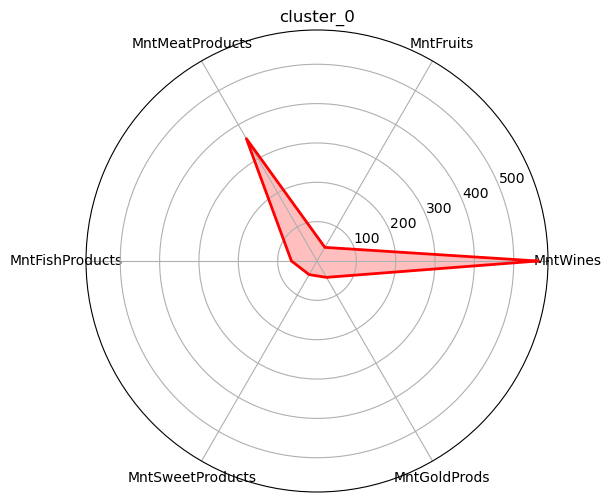

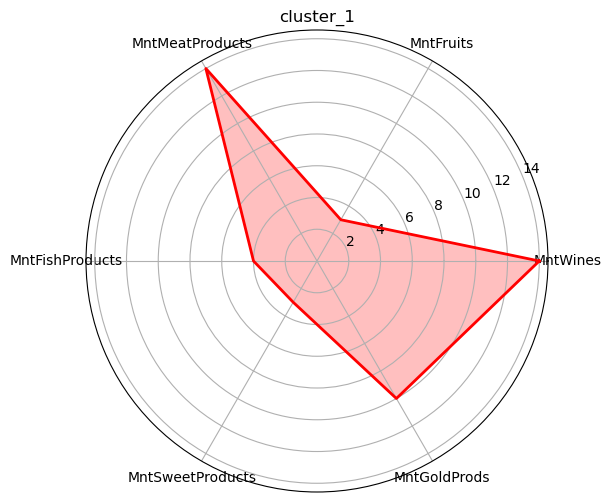

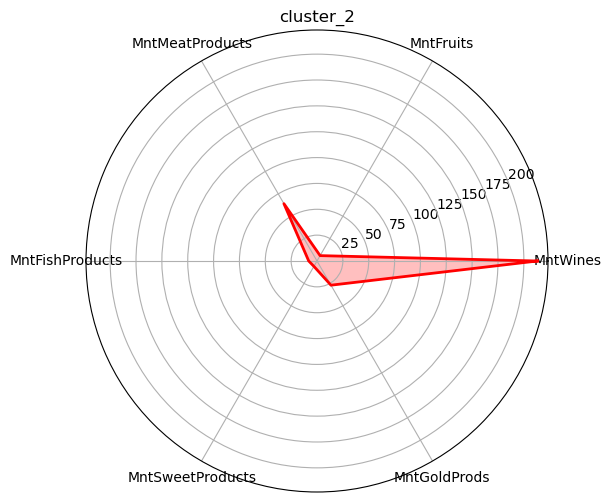

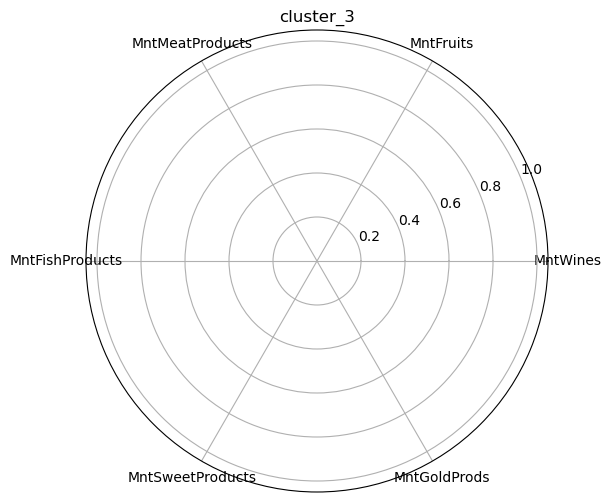

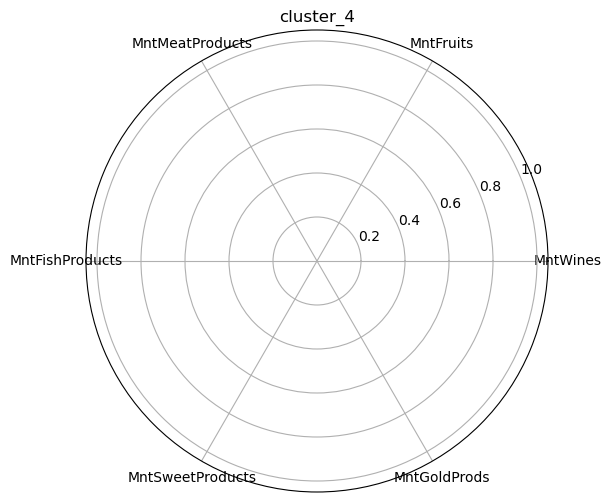

In [210]:
for elemento in grafico_mnt:
   stats= grafico_mnt[elemento].values.tolist()
   etiquetas = grafico_mnt.index.tolist()
   titulo = elemento
   crear_grafico_radar(stats,etiquetas, titulo)
   

In [211]:
stats_list = []
leyenda_multi = []
for elemento in grafico_mnt:
   temp_stats= grafico_mnt[elemento].values.tolist()
   temp_label = elemento
   stats_list.append(temp_stats)
   leyenda_multi.append(elemento)

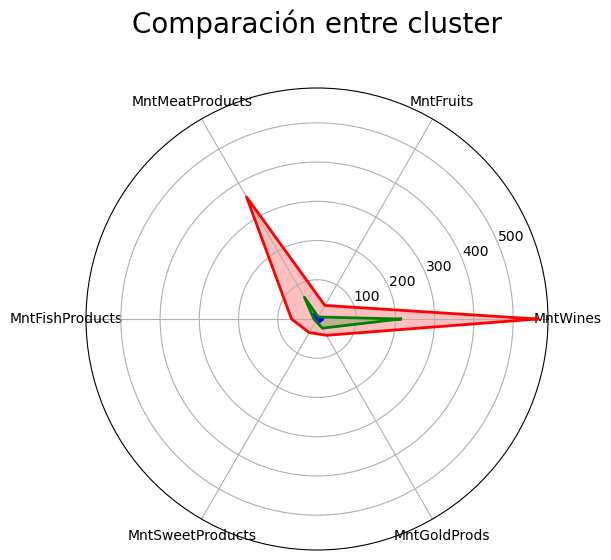

In [212]:
etiquetas_multi = grafico_mnt.index.to_list()
colores = ['red','blue', 'green', 'yellow', 'orange']

crear_grafico_radar_multiples(stats_list,etiquetas_multi,colores,'Comparación entre cluster', leyenda_multi)

#### Gráfico Purchase

In [213]:
grafico_purchase = cluster_df.loc[cluster_df.index.str.contains('Purchase')]
grafico_purchase

cluster_0  cluster_1  cluster_2  cluster_3  cluster_4
NumDealsPurchases          1.0        2.0        2.0        NaN        NaN
NumWebPurchases            5.0        2.0        4.0        NaN        NaN
NumCatalogPurchases        5.0        0.0        2.0        NaN        NaN
NumStorePurchases          8.0        3.0        5.0        NaN        NaN

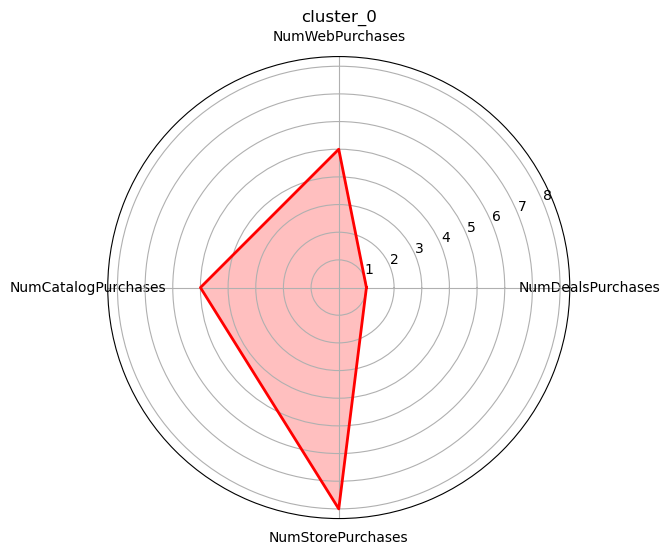

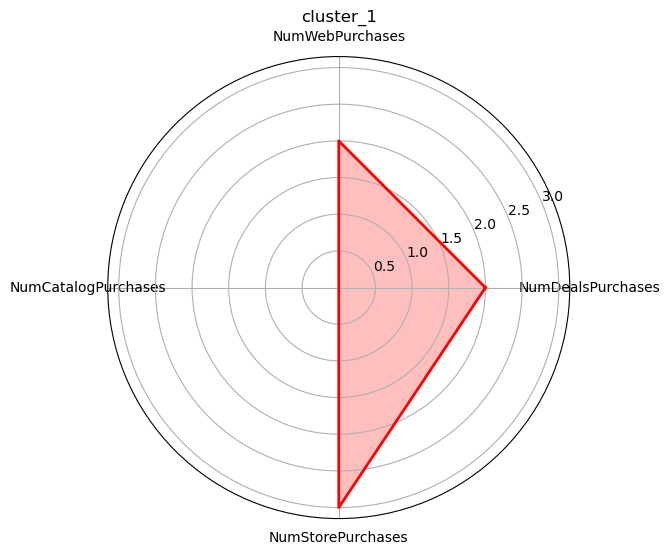

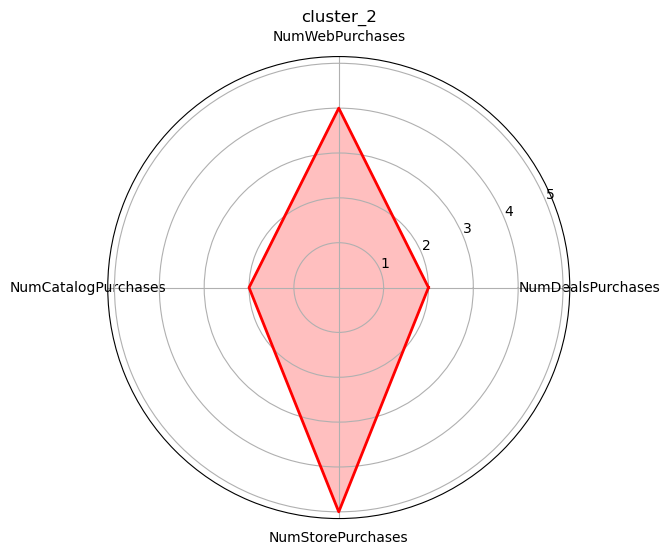

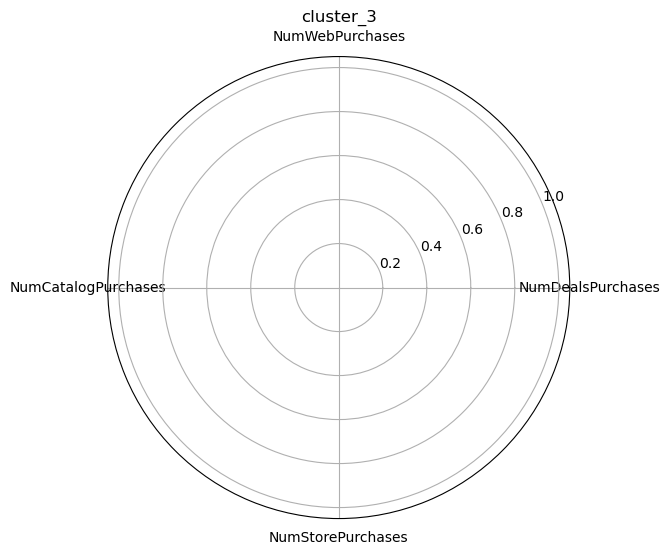

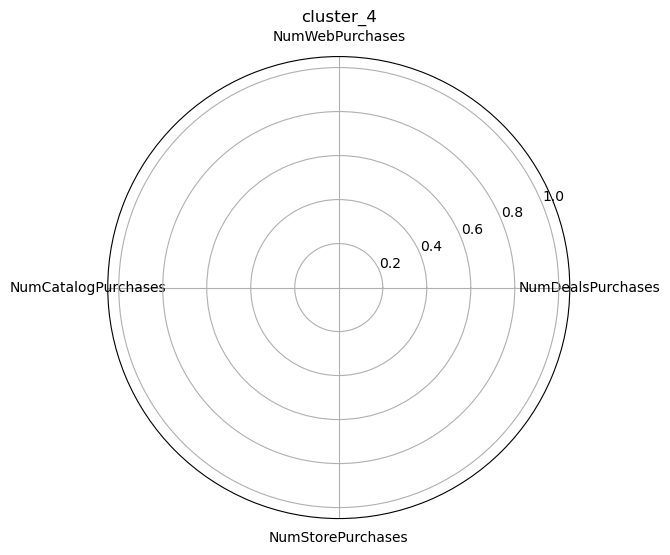

In [214]:
for elemento in grafico_mnt:
   stats= grafico_purchase[elemento].values.tolist()
   etiquetas = grafico_purchase.index.tolist()
   titulo = elemento
   crear_grafico_radar(stats,etiquetas, titulo)
   

In [215]:
stats_list = []
leyenda_multi = []
for elemento in grafico_purchase:
   temp_stats= grafico_purchase[elemento].values.tolist()
   temp_label = elemento
   stats_list.append(temp_stats)
   leyenda_multi.append(elemento)

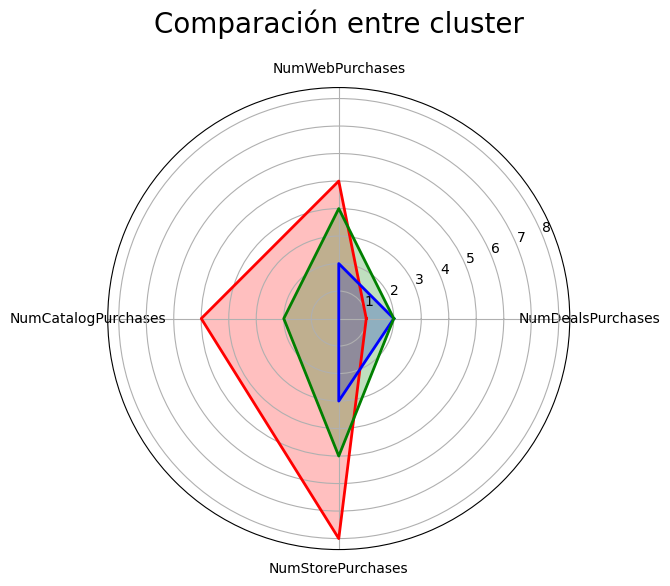

In [216]:
etiquetas_multi = grafico_purchase.index.to_list()
colores = ['red','blue', 'green', 'yellow', 'orange']

crear_grafico_radar_multiples(stats_list,etiquetas_multi,colores,'Comparación entre cluster', leyenda_multi)

#### Gráfico Total 
OJO!!! Total_amount está dividido entre 10

In [217]:
#cluster_df.loc['Income'] = cluster_df.loc['Income'] / 100
cluster_df.loc['Total_amount'] = cluster_df.loc['Total_amount'] / 10
grafico_total = cluster_df[cluster_df.index.to_series().str.contains('Total|age')]
grafico_total

cluster_0  cluster_1  cluster_2  cluster_3  cluster_4
age                  46.0       41.0       48.0        NaN        NaN
Total_amount        125.0        5.7       41.1        NaN        NaN
Total_purchase       20.0        7.0       16.0        NaN        NaN
Total_cmp             0.0        0.0        0.0        NaN        NaN

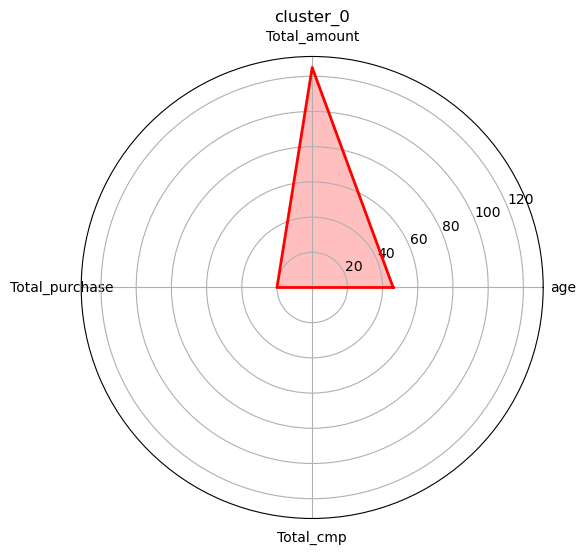

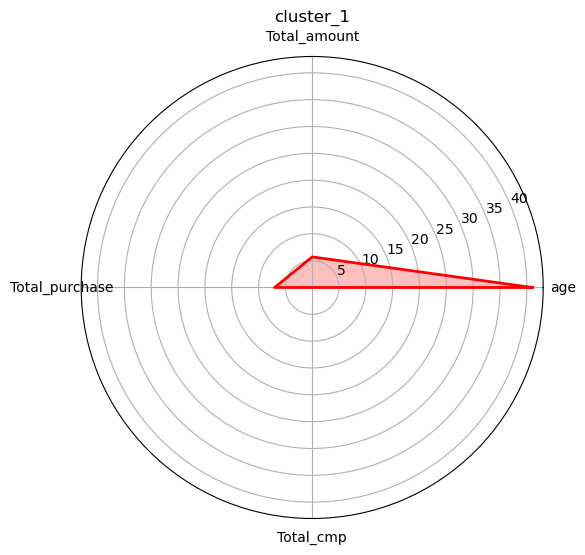

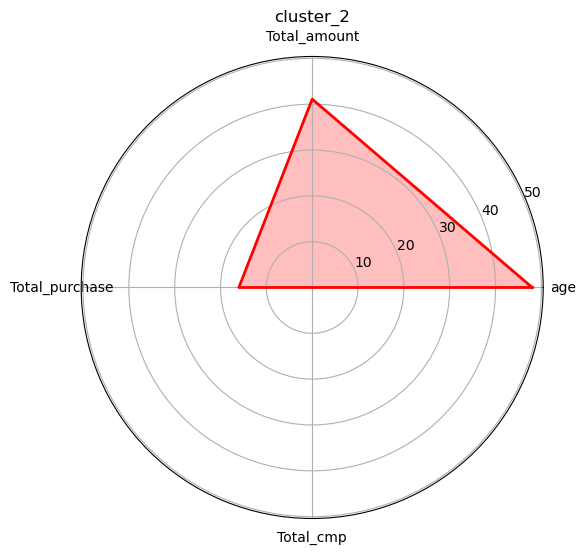

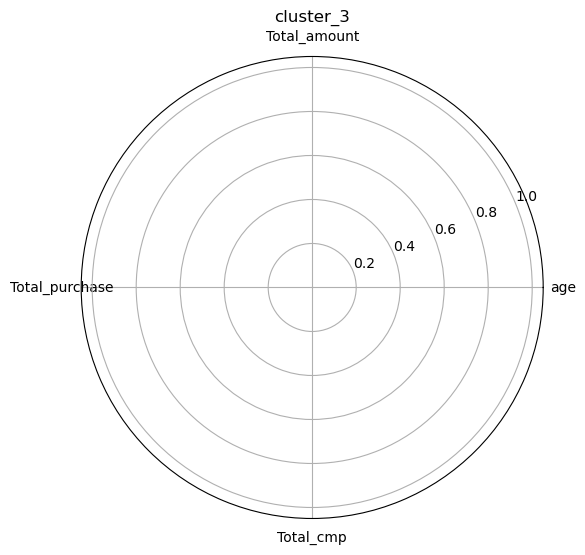

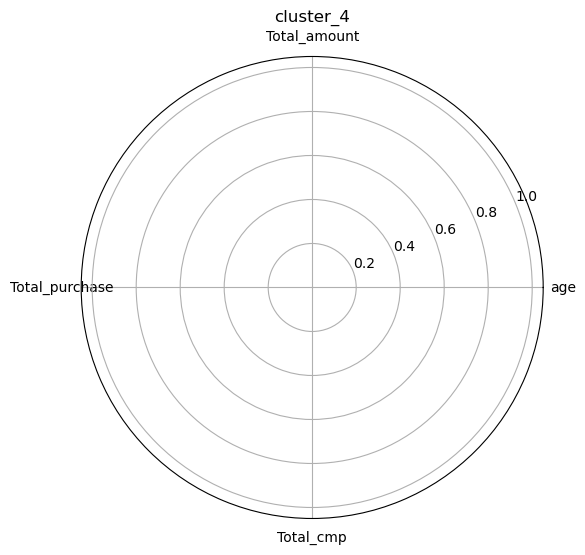

In [218]:
for elemento in grafico_total:
   stats= grafico_total[elemento].values.tolist()
   etiquetas = grafico_total.index.tolist()
   titulo = elemento
   crear_grafico_radar(stats,etiquetas, titulo)
   

In [219]:
stats_list = []
leyenda_multi = []
for elemento in grafico_total:
   temp_stats= grafico_total[elemento].values.tolist()
   temp_label = elemento
   stats_list.append(temp_stats)
   leyenda_multi.append(elemento)

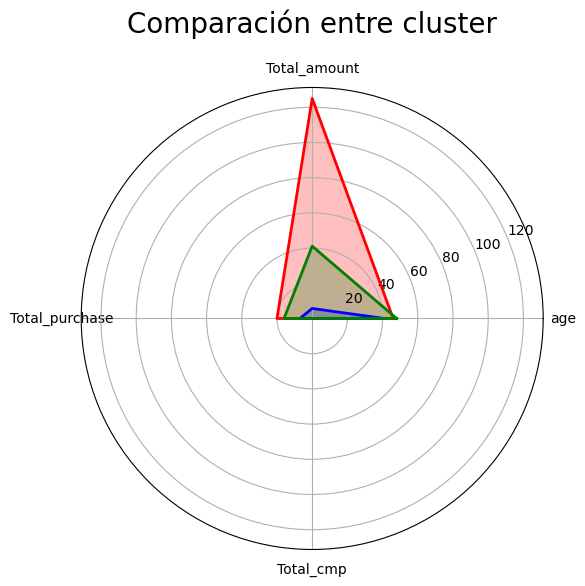

In [220]:
etiquetas_multi = grafico_total.index.to_list()
colores = ['red','blue', 'green', 'yellow', 'orange']

crear_grafico_radar_multiples(stats_list,etiquetas_multi,colores,'Comparación entre cluster', leyenda_multi)

In [221]:
train_set.to_csv('./data/train_set_cluster.csv')

### Análisis clúster con otras variables

#### Income vs Total Amount vs Clúster

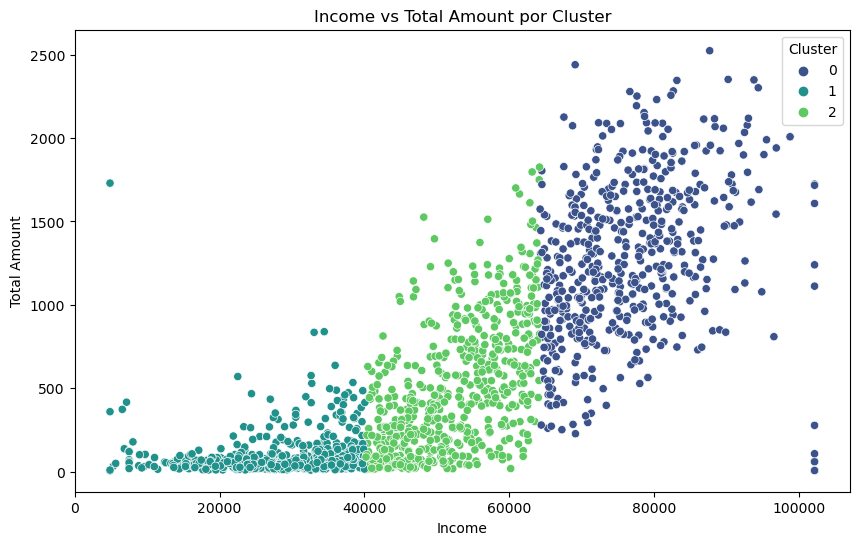

In [222]:
# Configuramos el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Creamos el scatterplot
sns.scatterplot(
    data=train_set,
    x='Income', 
    y='Total_amount', 
    hue='Cluster',
    palette='viridis', 
    legend='full'
)

# Títulos y etiquetas
plt.title('Income vs Total Amount por Cluster')
plt.xlabel('Income')
plt.ylabel('Total Amount')

# Mostramos la leyenda
plt.legend(title='Cluster')

# Mostramos el gráfico
plt.show()

#### Income vs Total_purchase vs Clúster

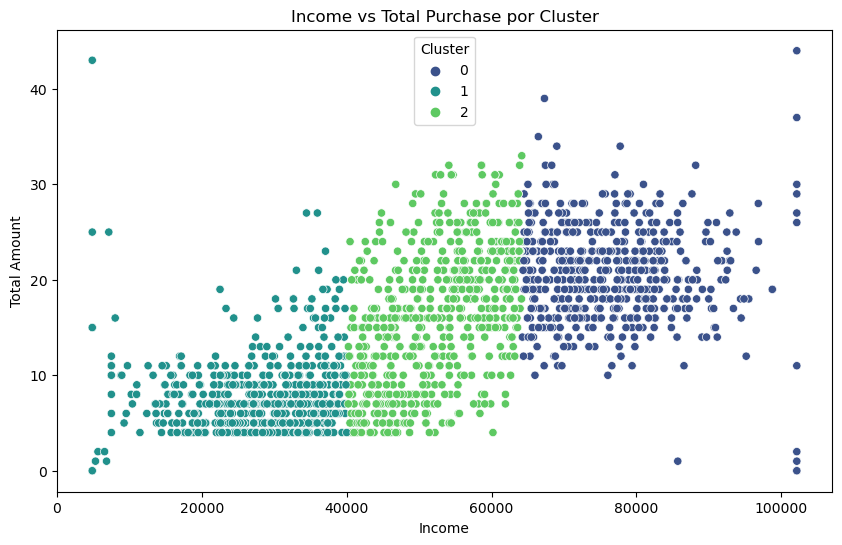

In [223]:
# Configuramos el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Creamos el scatterplot
sns.scatterplot(
    data=train_set,
    x='Income', 
    y='Total_purchase', 
    hue='Cluster',
    palette='viridis', 
    legend='full'
)

# Títulos y etiquetas
plt.title('Income vs Total Purchase por Cluster')
plt.xlabel('Income')
plt.ylabel('Total Amount')

# Mostramos la leyenda
plt.legend(title='Cluster')

# Mostramos el gráfico
plt.show()

#### Income vs Median_amount vs Clúster

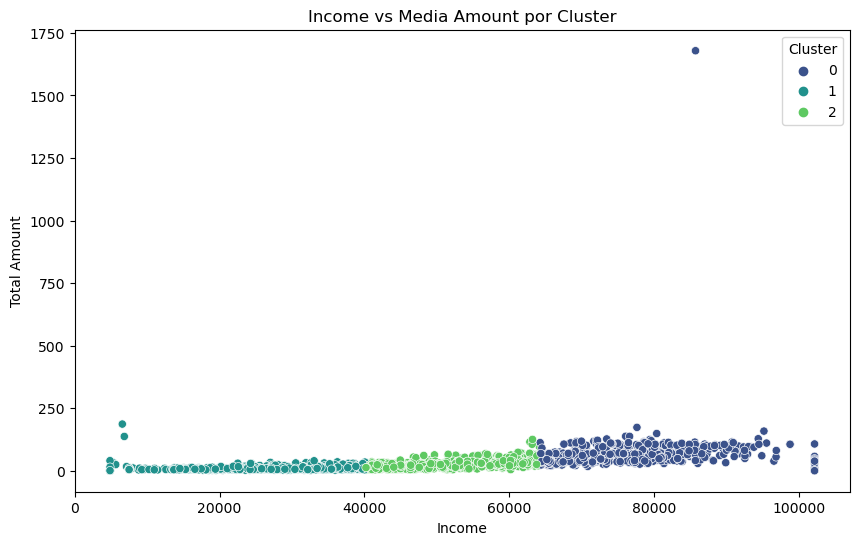

In [224]:
# Configuramos el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Creamos el scatterplot
sns.scatterplot(
    data=train_set,
    x='Income', 
    y='Median_amount_purchase', 
    hue='Cluster',
    palette='viridis', 
    legend='full'
)

# Títulos y etiquetas
plt.title('Income vs Media Amount por Cluster')
plt.xlabel('Income')
plt.ylabel('Total Amount')

# Mostramos la leyenda
plt.legend(title='Cluster')

# Mostramos el gráfico
plt.show()

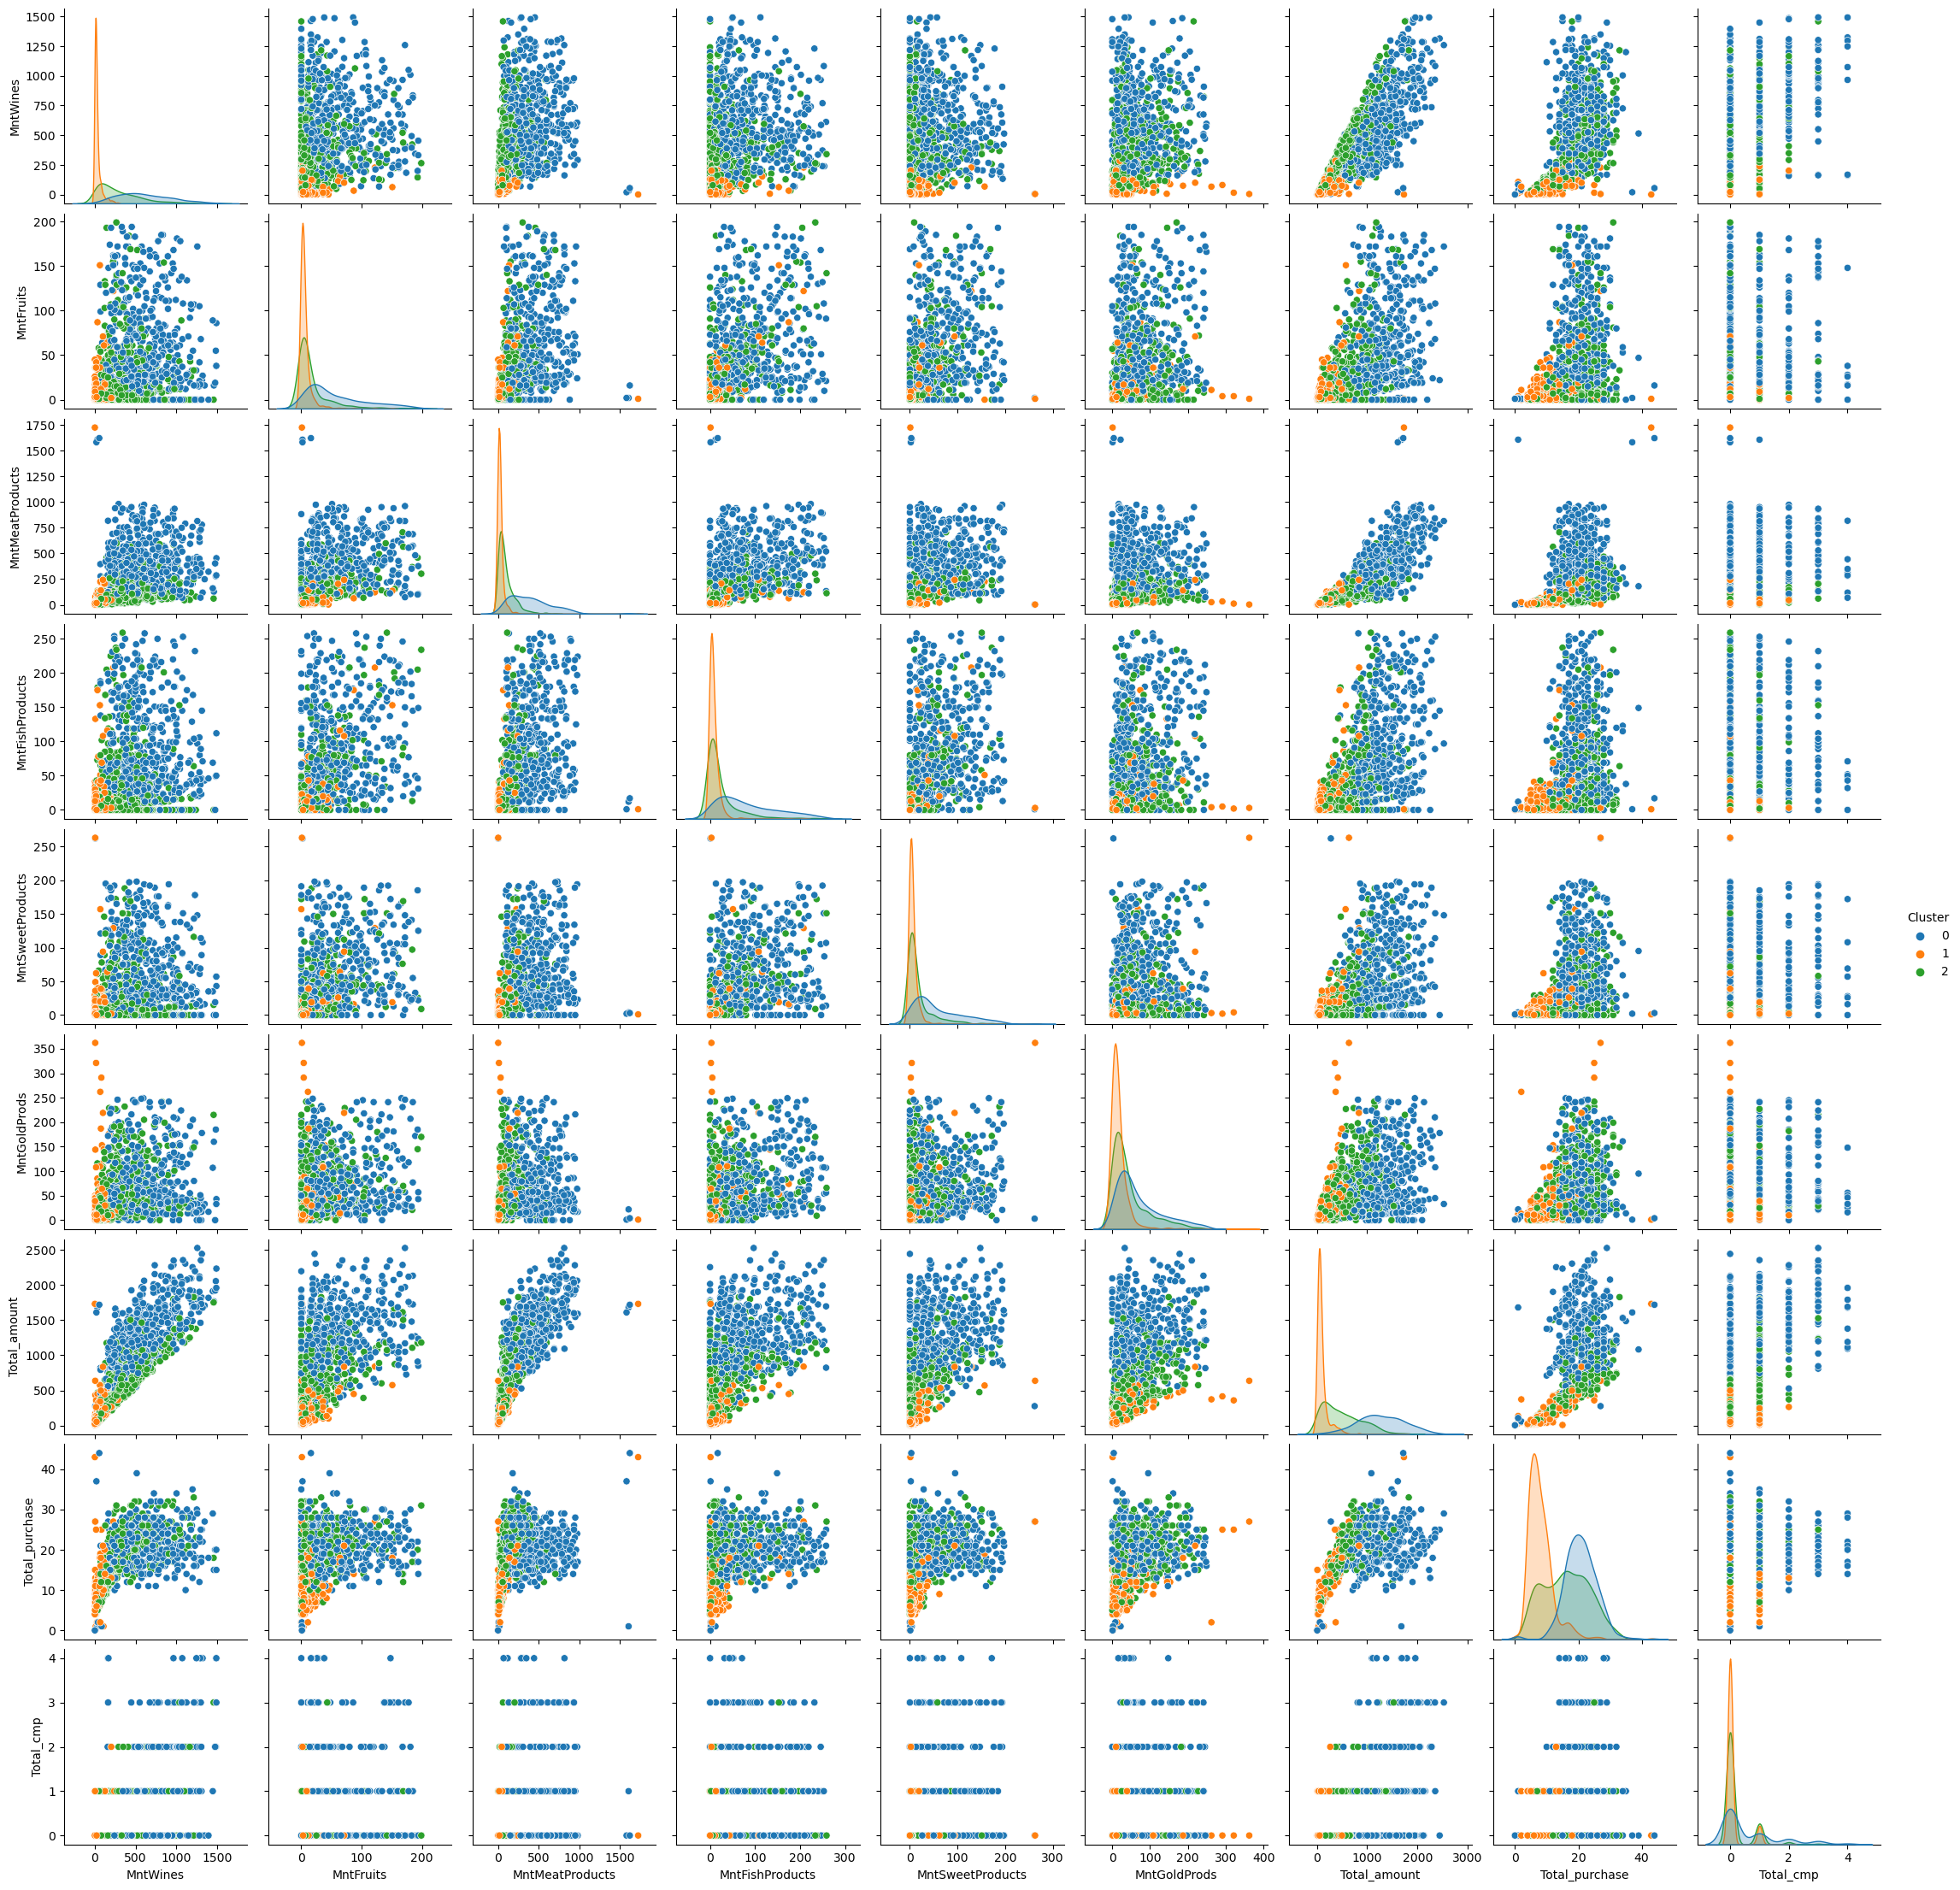

In [232]:
filtered_columns = train_set.filter(regex='(Mnt|Total)').copy()
filtered_columns['Cluster'] = train_set['Cluster']

sns.pairplot(filtered_columns, hue='Cluster')